# Reproduce all our experiments with only one file ✨
This is a fast visualization of most of the results in our paper. Read our paper for more details.

## Evaluation on SCOPe40-test

### Preprocess

In [1]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("3dblastsw" "clesw" "dalialn" "cealn" "blastp" "hhblits" "eat" "plm_blast" "foldseek_default" "foldseek" "foldseek_tm" "mmseqs2_default" "mmseqs2" "tmaln_default" "tmaln_avg_score" "tmaln" "euclidean" "cos" "ss_predictor_without_cos" "ss_predictor" "plmsearch")

for method in "${methods[@]}"; do
    ./bench_roc.awk ./scop_lookup.tsv <(cat ./search_result/${method}) > ./rocx/${method}.rocx
    sort -k3,3 -gr ./search_result/${method} > ./prx/sorted_search_result/${method}
    ./bench_pr.awk ./scop_lookup.tsv <(cat ./prx/sorted_search_result/${method}) > ./prx/${method}.prx
done
cd ../..

### AUROC

In [2]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("mmseqs2" "blastp" "hhblits" "eat" "plm_blast" "foldseek" "foldseek_tm" "tmaln" "ss_predictor" "plmsearch")

for method in "${methods[@]}"; do
    echo "Processing method: $method"
    ### The area under the curve (AUC) of the cumulative ROC curve up to the first FP
    awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/${method}.rocx
    ### The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP
    awk '{ FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/${method}.rocx
done
cd ../..


Processing method: mmseqs2
0.318421 0.0507028 0.00292006
2.206 0.516297 0.0247718 2.74707
Processing method: blastp
0.527044 0.161951 0.00490198
4.39113 1.21382 0.0547588 5.65971
Processing method: hhblits
0.92072 0.363134 0.0644976
9.10561 11.2581 3.92699 24.2907
Processing method: eat
0.648009 0.230843 0.0253926
6.17992 6.12516 1.6558 13.9609
Processing method: plm_blast
0.940748 0.642737 0.176003
8.96741 30.5789 13.9544 53.5007
Processing method: foldseek
0.883598 0.584344 0.214083
8.57366 28.3364 14.1917 51.1017
Processing method: foldseek_tm
0.898516 0.66496 0.296947
8.68709 34.6258 20.7979 64.1108
Processing method: tmaln
0.9355 0.721375 0.346205
9.29726 38.5776 24.8318 72.7066
Processing method: ss_predictor
0.889835 0.542428 0.113374
8.9296 21.8136 6.01956 36.7627
Processing method: plmsearch
0.917426 0.733827 0.298465
9.24641 34.3129 22.5189 66.0782


### ROC & PR curve

/home/lw/anaconda3/envs/plmsearch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


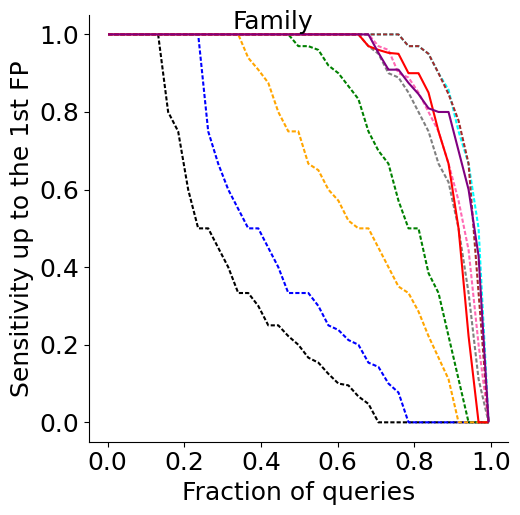

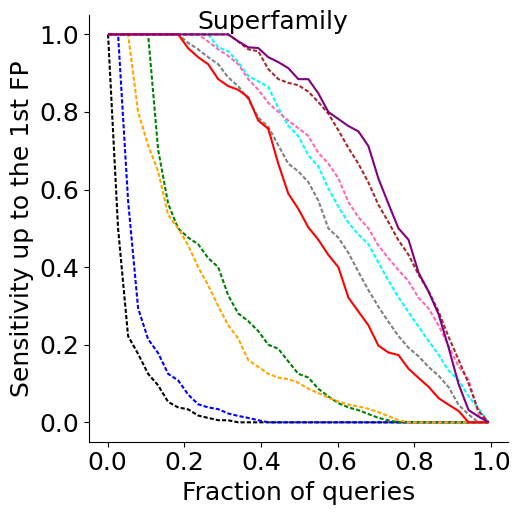

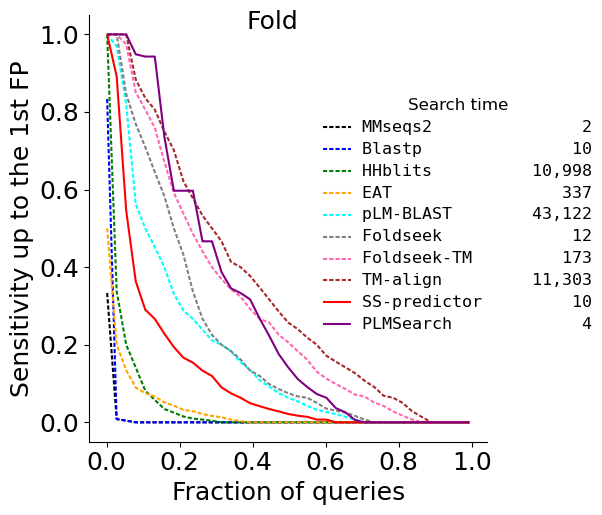

AUPR for MMseqs2      (Family): 0.4306558780105
AUPR for Blastp       (Family): 0.7173258768545
AUPR for HHblits      (Family): 0.969485359123
AUPR for EAT          (Family): 0.6465955447612999
AUPR for pLM-BLAST    (Family): 0.9731289842280498
AUPR for Foldseek     (Family): 0.9216823816435
AUPR for Foldseek-TM  (Family): 0.906342770718
AUPR for TM-align     (Family): 0.97139461992105
AUPR for SS-predictor (Family): 0.9135331779002499
AUPR for PLMSearch    (Family): 0.9255337197110501


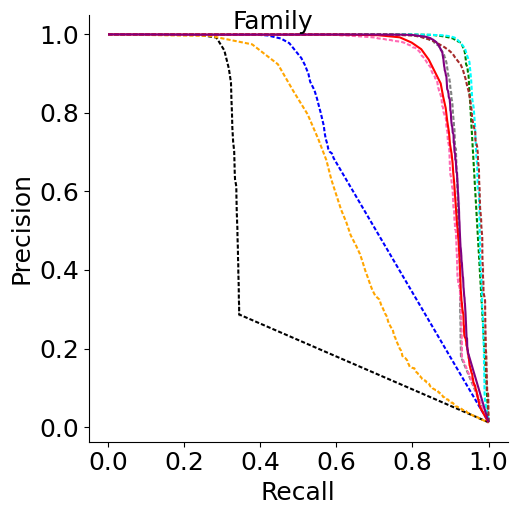

AUPR for MMseqs2      (Superfamily): 0.09116947131197001
AUPR for Blastp       (Superfamily): 0.34213436547425
AUPR for HHblits      (Superfamily): 0.6231545830755
AUPR for EAT          (Superfamily): 0.22561975020846994
AUPR for pLM-BLAST    (Superfamily): 0.77957182389135
AUPR for Foldseek     (Superfamily): 0.7038487970805
AUPR for Foldseek-TM  (Superfamily): 0.6954070194388
AUPR for TM-align     (Superfamily): 0.8662706986678499
AUPR for SS-predictor (Superfamily): 0.61309026419332
AUPR for PLMSearch    (Superfamily): 0.7689498754398251


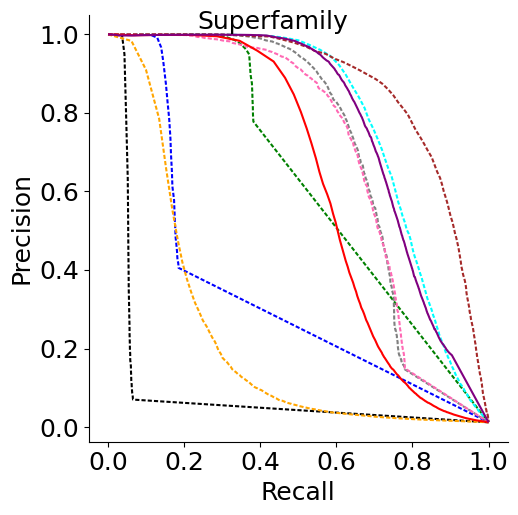

AUPR for MMseqs2      (Fold): 0.014699037189821
AUPR for Blastp       (Fold): 0.029886070875235003
AUPR for HHblits      (Fold): 0.2560610537968
AUPR for EAT          (Fold): 0.0209008651078582
AUPR for pLM-BLAST    (Fold): 0.30588673234589997
AUPR for Foldseek     (Fold): 0.32016287059099996
AUPR for Foldseek-TM  (Fold): 0.33772082937155
AUPR for TM-align     (Fold): 0.56917338174165
AUPR for SS-predictor (Fold): 0.18324057715983696
AUPR for PLMSearch    (Fold): 0.3120473874680405


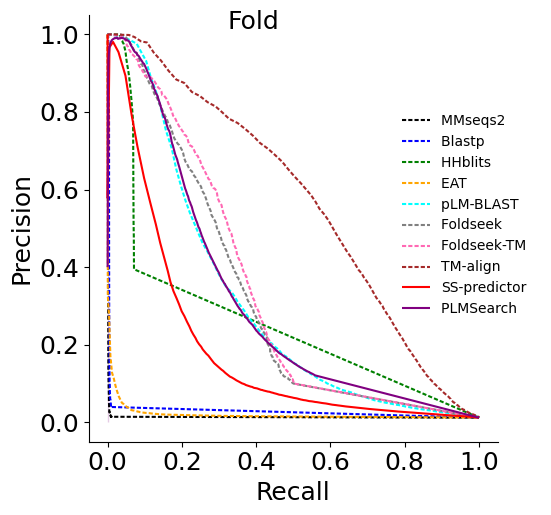

In [3]:
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import scop_roc, scop_pr

methods_name_list = ["MMseqs2", "Blastp", "HHblits", "EAT", "pLM-BLAST", "Foldseek", "Foldseek-TM", "TM-align", "SS-predictor", "PLMSearch"]
line_style = [(2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (1,0), (1,0)]
color_dict = {
    "MMseqs2": "black",
    "Blastp": "blue",
    "HHblits": "green",
    "EAT": "orange",
    "pLM-BLAST": "cyan",
    "Foldseek": "gray",
    "Foldseek-TM": "#FF69B4",
    "TM-align": "brown",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}

time_dict = {
    "MMseqs2": '2',
    "Blastp": '10',
    "HHblits": '10,998',
    "EAT": '337',
    "pLM-BLAST": '43,122',
    "Foldseek": '12',
    "Foldseek-TM": '173',
    "TM-align": '11,303',
    "SS-predictor": '10',
    "PLMSearch": '4'
}
# Find the maximum length of method names
max_length = max(len(method) for method in methods_name_list)
# Generate the formatted list
formatted_list = [f"{method.ljust(max_length)}     {time_dict[method].rjust(6)}" for method in methods_name_list]
alnresult_dir = "./plmsearch_data/scope_test/rocx/"
methods_filename_list = ["mmseqs2.rocx", "blastp.rocx", "hhblits.rocx", "eat.rocx", "plm_blast.rocx", "foldseek.rocx", "foldseek_tm.rocx", "tmaln.rocx", "ss_predictor.rocx", "plmsearch.rocx"]
scop_roc(alnresult_dir, methods_filename_list, formatted_list, line_style, color_dict, time=True)

# All-versus-all search on SCOPe40-test
formatted_list = [f"{method.ljust(max_length)}" for method in methods_name_list]
alnresult_dir = "./plmsearch_data/scope_test/prx/"
methods_filename_list = ["mmseqs2.prx", "blastp.prx", "hhblits.prx", "eat.prx", "plm_blast.prx", "foldseek.prx", "foldseek_tm.prx", "tmaln.prx", "ss_predictor.prx", "plmsearch.prx"]
scop_pr(alnresult_dir, methods_filename_list, formatted_list, line_style, color_dict, time=False)

### MAP & P@K on all protein and new protein

Get search list without self: 53886it [00:00, 203024.21it/s]
100%|██████████| 51679/51679 [00:00<00:00, 841773.18it/s]


MAP of MMseqs2:0.14763650587730087
P@1 of MMseqs2:0.6683280471227911
P@10 of MMseqs2:0.2608971454463088


Get search list without self: 29534it [00:00, 197408.11it/s]
100%|██████████| 27327/27327 [00:00<00:00, 695103.77it/s]


MAP of Blastp:0.18359553283874513
P@1 of Blastp:0.7177163570457635
P@10 of Blastp:0.354553692795652


Get search list without self: 49720it [00:00, 185615.43it/s]
100%|██████████| 47280/47280 [00:00<00:00, 807424.53it/s]


MAP of HHblits:0.320247192540529
P@1 of HHblits:0.8586316266425011
P@10 of HHblits:0.5777526053466242


Get search list without self: 4765489it [00:27, 175620.40it/s]
100%|██████████| 4763306/4763306 [00:03<00:00, 1450703.07it/s]


MAP of EAT:0.3509043045557305
P@1 of EAT:0.8133212505663797
P@10 of EAT:0.5758495695514283


Get search list without self: 4870849it [00:27, 174328.74it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1467576.24it/s]


MAP of pLM-BLAST:0.6594849518957107
P@1 of pLM-BLAST:0.9211599456275487
P@10 of pLM-BLAST:0.7608518350702311


Get search list without self: 396632it [00:02, 197212.04it/s]
100%|██████████| 394434/394434 [00:00<00:00, 1280666.19it/s]


MAP of Foldseek:0.5980508605255894
P@1 of Foldseek:0.9089261440869959
P@10 of Foldseek:0.7519256909832353


Get search list without self: 396632it [00:02, 180532.43it/s]
100%|██████████| 394434/394434 [00:00<00:00, 1308019.17it/s]


MAP of Foldseek-TM:0.6264157549479306
P@1 of Foldseek-TM:0.9053013140009062
P@10 of Foldseek-TM:0.7564567285908471


Get search list without self: 4870849it [00:29, 166639.58it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1444106.94it/s]


MAP of TM-align:0.7810308406028499
P@1 of TM-align:0.9410965111010421
P@10 of TM-align:0.8062981422745811


Get search list without self: 4870849it [00:29, 163100.53it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1425883.75it/s]


MAP of SS-predictor:0.56963262263967
P@1 of SS-predictor:0.8500226551880381
P@10 of SS-predictor:0.7233801540552787


Get search list without self: 837769it [00:04, 167837.78it/s]
100%|██████████| 835562/835562 [00:00<00:00, 1254932.95it/s]


MAP of PLMSearch:0.6830676794934877
P@1 of PLMSearch:0.9265971907566832
P@10 of PLMSearch:0.7702763932940632


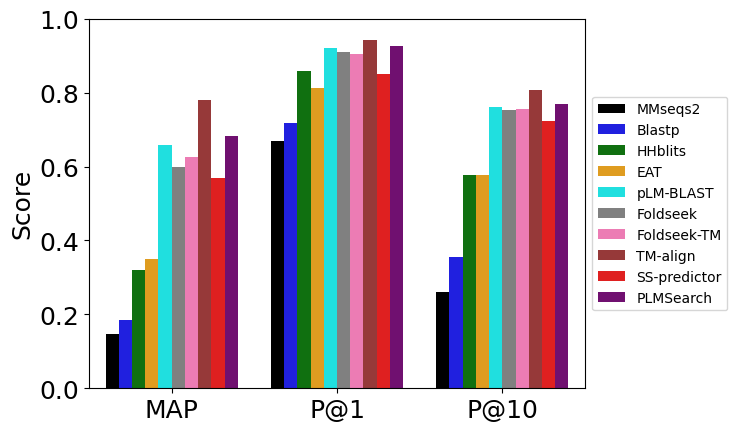

############# Experiment on new proteins #############
Total count of new proteins: 123


Get search list without self: 53886it [00:00, 162036.44it/s]
100%|██████████| 51679/51679 [00:00<00:00, 868812.55it/s]


MAP of MMseqs2:0.10789735652203053
P@1 of MMseqs2:0.4959349593495935
P@10 of MMseqs2:0.13739837398373983


Get search list without self: 29534it [00:00, 196732.48it/s]
100%|██████████| 27327/27327 [00:00<00:00, 677157.71it/s]


MAP of Blastp:0.13316952668802284
P@1 of Blastp:0.5853658536585366
P@10 of Blastp:0.2601626016260164


Get search list without self: 49720it [00:00, 205848.50it/s]
100%|██████████| 47280/47280 [00:00<00:00, 893849.16it/s]


MAP of HHblits:0.2972163060301458
P@1 of HHblits:0.8861788617886179
P@10 of HHblits:0.5756097560975609


Get search list without self: 4765489it [00:26, 181960.68it/s]
100%|██████████| 4763306/4763306 [00:03<00:00, 1460493.06it/s]


MAP of EAT:0.3183916730775492
P@1 of EAT:0.7886178861788617
P@10 of EAT:0.5520325203252036


Get search list without self: 4870849it [00:28, 168101.81it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1461916.42it/s]


MAP of pLM-BLAST:0.6827907330938235
P@1 of pLM-BLAST:0.943089430894309
P@10 of pLM-BLAST:0.7837398373983742


Get search list without self: 396632it [00:02, 163925.37it/s]
100%|██████████| 394434/394434 [00:00<00:00, 1258286.41it/s]


MAP of Foldseek:0.5213558694213682
P@1 of Foldseek:0.8780487804878049
P@10 of Foldseek:0.7121951219512195


Get search list without self: 396632it [00:02, 171487.10it/s]
100%|██████████| 394434/394434 [00:00<00:00, 1317684.10it/s]


MAP of Foldseek-TM:0.5624689050210423
P@1 of Foldseek-TM:0.8861788617886179
P@10 of Foldseek-TM:0.7235772357723579


Get search list without self: 4870849it [00:29, 164622.14it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1346661.13it/s]


MAP of TM-align:0.7703689653528675
P@1 of TM-align:0.9512195121951219
P@10 of TM-align:0.7991869918699188


Get search list without self: 4870849it [00:32, 152169.50it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1449862.36it/s]


MAP of SS-predictor:0.5770145894796361
P@1 of SS-predictor:0.8130081300813008
P@10 of SS-predictor:0.7260162601626016


Get search list without self: 837769it [00:05, 152314.97it/s]
100%|██████████| 835562/835562 [00:00<00:00, 1392568.69it/s]


MAP of PLMSearch:0.5770145894796361
P@1 of PLMSearch:0.8130081300813008
P@10 of PLMSearch:0.7260162601626016


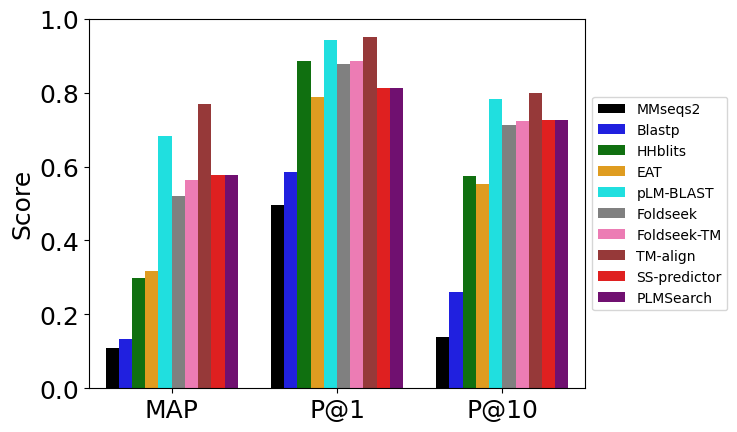

In [4]:
import sys
sys.path.append("./plmsearch/")
import json
from plmsearch.plmsearch_util.statistics_util import get_input_output, map_pk, map_pk_plot

todo_name_list = [
    "mmseqs2", 
    "blastp",
    "hhblits",
    "eat",
    "plm_blast",
    "foldseek",
    "foldseek_tm",
    "tmaln",
    "ss_predictor",
    "plmsearch"
]
color_dict = {
    "MMseqs2": "black",
    "Blastp": "blue",
    "HHblits": "green",
    "EAT": "orange",
    "pLM-BLAST": "cyan",
    "Foldseek": "gray",
    "Foldseek-TM": "#FF69B4",
    "TM-align": "brown",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}
method_list = ["MMseqs2", "Blastp", "HHblits", "EAT", "pLM-BLAST", "Foldseek", "Foldseek-TM", "TM-align", "SS-predictor", "PLMSearch"]

todo_dir_list = ["./plmsearch_data/scope_test/search_result/"]
same_fold_mat = "./plmsearch_data/scope_test/same_fold_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]

# All query protein
df_dict_1 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)
map_pk_plot(df_dict_1, color_dict, legend=True)

# New query protein (without pfam result)
special_protein_list = []
with open("./plmsearch_data/scope_test/pfam_result.json", 'r') as pfam_json_f:
    pfam_result = json.load(pfam_json_f)

for protein_id, pfam_data in pfam_result.items():
    if not pfam_data:
        special_protein_list.append(protein_id)
print(f"############# Experiment on new proteins #############")
print(f"Total count of new proteins: {len(special_protein_list)}")
df_dict_2 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list, special_protein_list=special_protein_list)
map_pk_plot(df_dict_2, color_dict, legend=True)

### Protein search with Swiss-Prot as target database


Test on Swiss-Prot to Swiss-Prot (50 queries)


Get search list without self: 63969it [00:00, 174361.87it/s]
100%|██████████| 63919/63919 [00:00<00:00, 454876.76it/s]


MAP of MMseqs2:0.4984548549636961
P@1 of MMseqs2:1.0
P@10 of MMseqs2:0.95


Get search list without self: 19099it [00:00, 185722.66it/s]
100%|██████████| 19049/19049 [00:00<00:00, 428990.29it/s]


MAP of Blastp:0.46002057595572
P@1 of Blastp:1.0
P@10 of Blastp:0.9460000000000001


Get search list without self: 75491it [00:00, 180262.11it/s]
100%|██████████| 75441/75441 [00:00<00:00, 496715.21it/s]


MAP of Foldseek:0.6277197439002281
P@1 of Foldseek:0.84
P@10 of Foldseek:0.8619999999999999


Get search list without self: 75491it [00:00, 181715.62it/s]
100%|██████████| 75441/75441 [00:00<00:00, 485539.18it/s]


MAP of Foldseek-TM:0.6957465795971222
P@1 of Foldseek-TM:1.0
P@10 of Foldseek-TM:0.9700000000000002


Get search list without self: 21507000it [02:25, 147376.33it/s]
100%|██████████| 21506950/21506950 [00:22<00:00, 952085.64it/s]


MAP of SS-predictor:0.8391752702101382
P@1 of SS-predictor:1.0
P@10 of SS-predictor:0.9520000000000001


Get search list without self: 439249it [00:04, 106500.11it/s]
100%|██████████| 439199/439199 [00:00<00:00, 815328.71it/s]


MAP of PLMSearch:0.8234104562501895
P@1 of PLMSearch:1.0
P@10 of PLMSearch:0.9460000000000001
Test on SCOPe40 to Swiss-Prot (50 queries)


Get search list without self: 44832it [00:00, 181328.08it/s]
100%|██████████| 44832/44832 [00:00<00:00, 432684.45it/s]


MAP of MMseqs2:0.19199926540132875
P@1 of MMseqs2:0.6041666666666666
P@10 of MMseqs2:0.525


Get search list without self: 9999it [00:00, 180894.86it/s]
100%|██████████| 9999/9999 [00:00<00:00, 424057.33it/s]


MAP of Blastp:0.22681372550872925
P@1 of Blastp:0.625
P@10 of Blastp:0.5499999999999999


Get search list without self: 38405it [00:00, 177913.58it/s]
100%|██████████| 38405/38405 [00:00<00:00, 441455.47it/s]


MAP of Foldseek:0.3666555278981365
P@1 of Foldseek:0.625
P@10 of Foldseek:0.5333333333333333


Get search list without self: 38405it [00:00, 182045.10it/s]
100%|██████████| 38405/38405 [00:00<00:00, 375797.57it/s]


MAP of Foldseek-TM:0.4068634278996339
P@1 of Foldseek-TM:0.6666666666666666
P@10 of Foldseek-TM:0.61875


Get search list without self: 21507000it [02:26, 146469.99it/s]
100%|██████████| 21507000/21507000 [00:22<00:00, 941274.15it/s]


MAP of SS-predictor:0.44784118395873906
P@1 of SS-predictor:0.6875
P@10 of SS-predictor:0.6020833333333334


Get search list without self: 1063381it [00:07, 136185.22it/s]
100%|██████████| 1063381/1063381 [00:01<00:00, 897006.48it/s]


MAP of PLMSearch:0.4794458768701892
P@1 of PLMSearch:0.6875
P@10 of PLMSearch:0.6333333333333334

Summary for Swiss-Prot search tests(100 queries)
MAP of MMseqs2:0.3452270601825124
P@1 of MMseqs2:0.8020833333333333
P@10 of MMseqs2:0.7375
MAP of Blastp:0.3434171507322246
P@1 of Blastp:0.8125
P@10 of Blastp:0.748
MAP of Foldseek:0.4971876358991823
P@1 of Foldseek:0.7324999999999999
P@10 of Foldseek:0.6976666666666667
MAP of Foldseek-TM:0.551305003748378
P@1 of Foldseek-TM:0.8333333333333333
P@10 of Foldseek-TM:0.794375
MAP of SS-predictor:0.6435082270844386
P@1 of SS-predictor:0.84375
P@10 of SS-predictor:0.7770416666666667
MAP of PLMSearch:0.6514281665601893
P@1 of PLMSearch:0.84375
P@10 of PLMSearch:0.7896666666666667


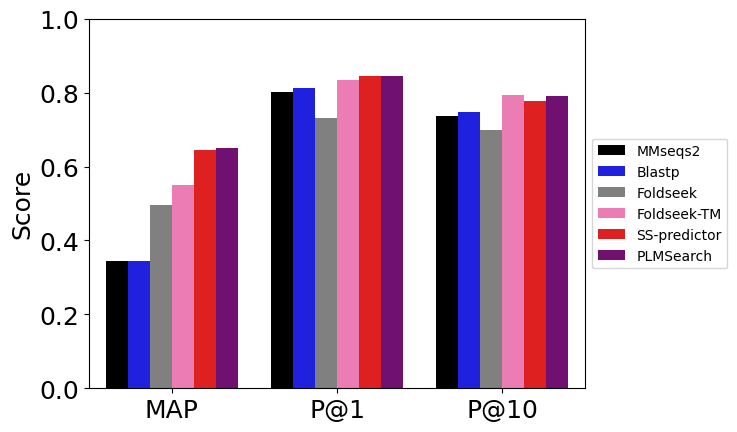

In [5]:
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import get_input_output, map_pk, map_pk_plot

todo_name_list = [
    "mmseqs2",
    "blastp",
    "foldseek",
    "foldseek_tm",
    "ss_predictor",
    "plmsearch"
]
color_dict = {
    "MMseqs2": "black",
    "Blastp": "blue",
    "Foldseek": "gray",
    "Foldseek-TM": "#FF69B4",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}
method_list = ["MMseqs2", "Blastp", "Foldseek", "Foldseek-TM", "SS-predictor", "PLMSearch"]

# Swiss-Prot to Swiss-Prot
print("Test on Swiss-Prot to Swiss-Prot (50 queries)")
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]
df_dict_1 = map_pk(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)

# SCOPe40 to Swiss-Prot
print("Test on SCOPe40 to Swiss-Prot (50 queries)")
todo_dir_list = ["./plmsearch_data/scope_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/scope_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]
df_dict_2 = map_pk(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)

# Summary: Swiss-Prot
print("\nSummary for Swiss-Prot search tests(100 queries)")
for i in range(len(df_dict_2['score'])):
    df_dict_2['score'][i] = (df_dict_1['score'][i] + df_dict_2['score'][i])/2
    print(f"{df_dict_2['metric'][i]} of {df_dict_2['method'][i]}:{df_dict_2['score'][i]}")
map_pk_plot(df_dict_2, color_dict, legend=True)

### Ablation experiment

In [6]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("euclidean" "cos" "ss_predictor_without_cos" "ss_predictor" "plmsearch")

for method in "${methods[@]}"; do
    echo "Processing method: $method"
    ### The area under the curve (AUC) of the cumulative ROC curve up to the first FP
    awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/${method}.rocx
    ### The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP
    awk '{ FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/${method}.rocx
done
cd ../..

Processing method: euclidean
0.69984 0.309711 0.0393833
6.88787 8.52934 1.70535 17.1226
Processing method: cos
0.705049 0.316141 0.0402969
6.94915 8.79791 1.77966 17.5267
Processing method: ss_predictor_without_cos
0.874964 0.515028 0.10878
8.79009 19.8957 5.40287 34.0887
Processing method: ss_predictor
0.889835 0.542428 0.113374
8.9296 21.8136 6.01956 36.7627
Processing method: plmsearch
0.917426 0.733827 0.298465
9.24641 34.3129 22.5189 66.0782


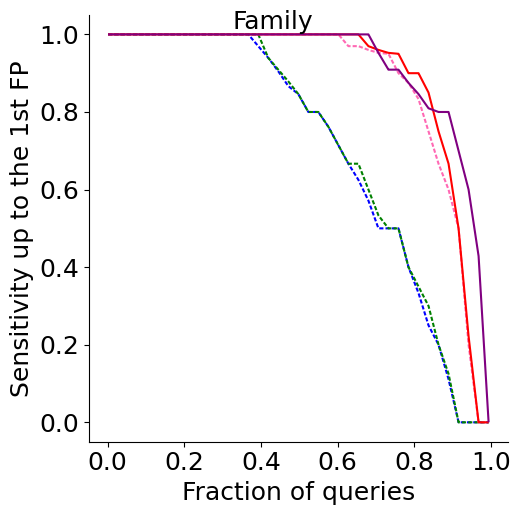

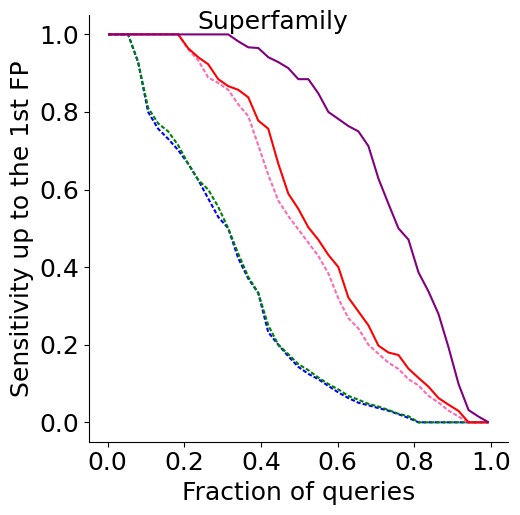

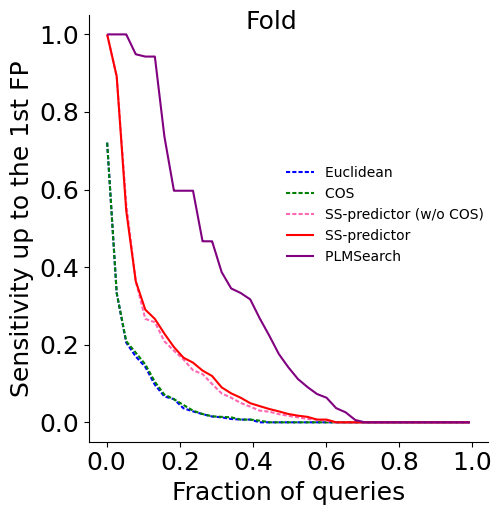

AUPR for Euclidean              (Family): 0.45673660993055004
AUPR for COS                    (Family): 0.5143461242972
AUPR for SS-predictor (w/o COS) (Family): 0.90147601356655
AUPR for SS-predictor           (Family): 0.9135331779002499
AUPR for PLMSearch              (Family): 0.9255337197110501


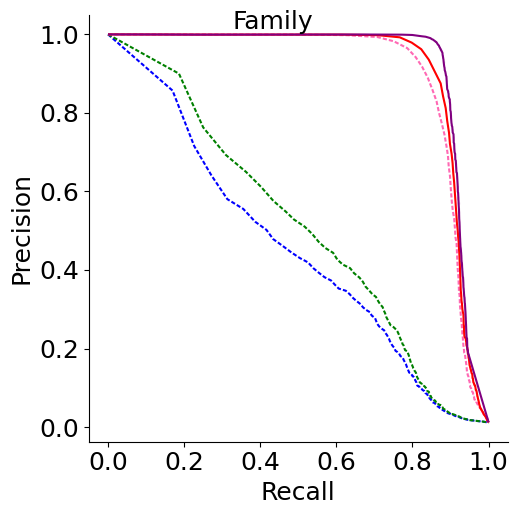

AUPR for Euclidean              (Superfamily): 0.1076691008781
AUPR for COS                    (Superfamily): 0.13053060715428
AUPR for SS-predictor (w/o COS) (Superfamily): 0.6010194034792
AUPR for SS-predictor           (Superfamily): 0.61309026419332
AUPR for PLMSearch              (Superfamily): 0.7689498754398251


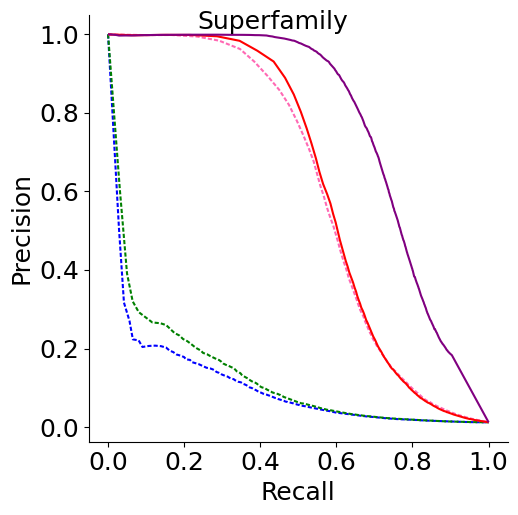

AUPR for Euclidean              (Fold): 0.01684188253212964
AUPR for COS                    (Fold): 0.017752010257859836
AUPR for SS-predictor (w/o COS) (Fold): 0.179561306212992
AUPR for SS-predictor           (Fold): 0.18324057715983696
AUPR for PLMSearch              (Fold): 0.3120473874680405


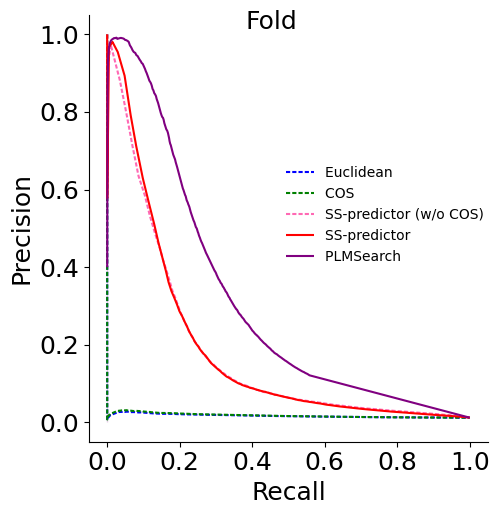

In [7]:
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import scop_roc, scop_pr

# Ablation1, scope roc
methods_name_list = ["Euclidean", "COS", "SS-predictor (w/o COS)", "SS-predictor", "PLMSearch"]
line_style = [(2,1), (2,1), (2,1), (1,0), (1,0)]
color_dict = {
    "Euclidean": "blue",
    "COS": "green",
    "SS-predictor (w/o COS)": "#FF69B4",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}

# Find the maximum length of method names
max_length = max(len(method) for method in methods_name_list)
# Generate the formatted list
formatted_list = [f"{method.ljust(max_length)}" for method in methods_name_list]

alnresult_dir = "./plmsearch_data/scope_test/rocx/"
methods_filename_list = ["euclidean.rocx", "cos.rocx", "ss_predictor_without_cos.rocx", "ss_predictor.rocx", "plmsearch.rocx"]
scop_roc(alnresult_dir, methods_filename_list, formatted_list, line_style, color_dict, legend_pos=0.7)

alnresult_dir = "./plmsearch_data/scope_test/prx/"
methods_filename_list = ["euclidean.prx", "cos.prx", "ss_predictor_without_cos.prx", "ss_predictor.prx", "plmsearch.prx"]
scop_pr(alnresult_dir, methods_filename_list, formatted_list, line_style, color_dict, legend_pos=0.7)

Get search list without self: 4870849it [00:30, 159906.38it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1457747.00it/s]


MAP of Euclidean:0.36503174351240475
P@1 of Euclidean:0.8296329859537834
P@10 of Euclidean:0.6035795197100133


Get search list without self: 4870849it [00:30, 159204.36it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1423259.12it/s]


MAP of COS:0.36768265353798063
P@1 of COS:0.8300860897145447
P@10 of COS:0.6066153149071138


Get search list without self: 4870849it [00:30, 157144.18it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1424523.52it/s]


MAP of SS-predictor (w/o COS):0.5598318314578931
P@1 of SS-predictor (w/o COS):0.8405074762120526
P@10 of SS-predictor (w/o COS):0.7113729043951069


Get search list without self: 4870849it [00:30, 157788.28it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1469775.86it/s]


MAP of SS-predictor:0.56963262263967
P@1 of SS-predictor:0.8500226551880381
P@10 of SS-predictor:0.7233801540552787


Get search list without self: 837769it [00:05, 166879.17it/s]
100%|██████████| 835562/835562 [00:00<00:00, 1397537.12it/s]


MAP of PLMSearch:0.6830676794934877
P@1 of PLMSearch:0.9265971907566832
P@10 of PLMSearch:0.7702763932940632


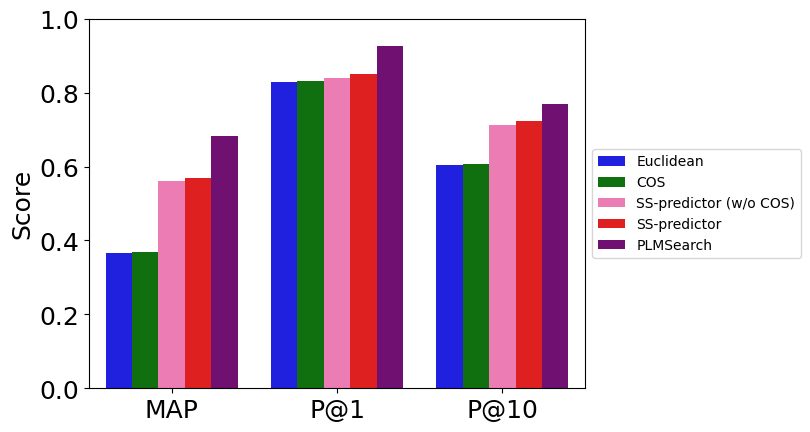

############# Experiment on new proteins #############
Total count of new proteins: 123


Get search list without self: 4870849it [00:30, 161091.85it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1398683.75it/s]


MAP of Euclidean:0.37177821856542775
P@1 of Euclidean:0.7967479674796748
P@10 of Euclidean:0.6097560975609755


Get search list without self: 4870849it [00:31, 156798.36it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1418199.16it/s]


MAP of COS:0.3762865875450964
P@1 of COS:0.7967479674796748
P@10 of COS:0.6162601626016261


Get search list without self: 4870849it [00:30, 161635.50it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1445839.11it/s]


MAP of SS-predictor (w/o COS):0.5683649740740043
P@1 of SS-predictor (w/o COS):0.8130081300813008
P@10 of SS-predictor (w/o COS):0.7170731707317071


Get search list without self: 4870849it [00:30, 160267.91it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1455669.12it/s]


MAP of SS-predictor:0.5770145894796361
P@1 of SS-predictor:0.8130081300813008
P@10 of SS-predictor:0.7260162601626016


Get search list without self: 837769it [00:05, 164355.15it/s]
100%|██████████| 835562/835562 [00:00<00:00, 1392090.22it/s]


MAP of PLMSearch:0.5770145894796361
P@1 of PLMSearch:0.8130081300813008
P@10 of PLMSearch:0.7260162601626016


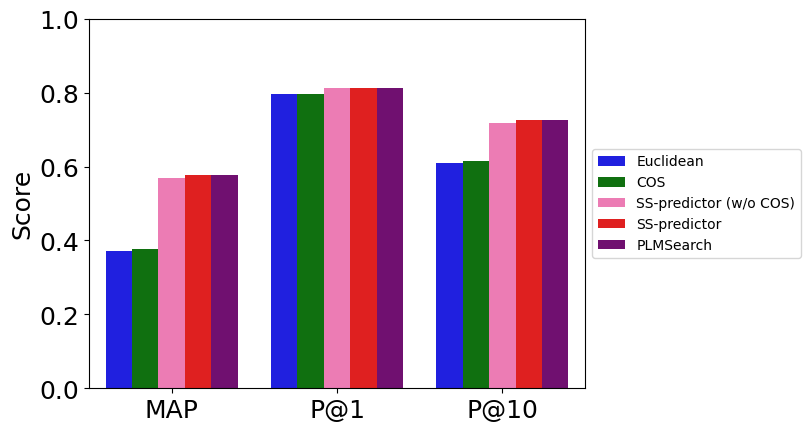

In [8]:
import sys
sys.path.append("./plmsearch/")
import json
from plmsearch.plmsearch_util.statistics_util import get_input_output, map_pk, map_pk_plot

todo_name_list = [
    "euclidean",
    "cos",
    "ss_predictor_without_cos",
    "ss_predictor",
    "plmsearch"
]
color_dict = {
    "Euclidean": "blue",
    "COS": "green",
    "SS-predictor (w/o COS)": "#FF69B4",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}
method_list = ["Euclidean", "COS", "SS-predictor (w/o COS)", "SS-predictor", "PLMSearch"]

todo_dir_list = ["./plmsearch_data/scope_test/search_result/"]
same_fold_mat = "./plmsearch_data/scope_test/same_fold_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]

# All query protein
df_dict_1 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)
map_pk_plot(df_dict_1, color_dict, legend=True)

# New query protein (without pfam result)
special_protein_list = []
with open("./plmsearch_data/scope_test/pfam_result.json", 'r') as pfam_json_f:
    pfam_result = json.load(pfam_json_f)

for protein_id, pfam_data in pfam_result.items():
    if not pfam_data:
        special_protein_list.append(protein_id)
print(f"############# Experiment on new proteins #############")
print(f"Total count of new proteins: {len(special_protein_list)}")
df_dict_2 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list, special_protein_list=special_protein_list)
map_pk_plot(df_dict_2, color_dict, legend=True)

Get search list without self: 21507000it [02:27, 146060.11it/s]
100%|██████████| 21506950/21506950 [00:22<00:00, 948401.28it/s]


MAP of Euclidean:0.6100047922119889
P@1 of Euclidean:1.0
P@10 of Euclidean:0.9640000000000001


Get search list without self: 21507000it [02:52, 124378.85it/s]
100%|██████████| 21506950/21506950 [00:22<00:00, 939077.87it/s]


MAP of COS:0.6114928249968569
P@1 of COS:1.0
P@10 of COS:0.9640000000000001


Get search list without self: 21507000it [02:48, 127430.20it/s]
100%|██████████| 21506950/21506950 [00:23<00:00, 907425.73it/s]


MAP of SS-predictor (w/o COS):0.8042612339831534
P@1 of SS-predictor (w/o COS):0.88
P@10 of SS-predictor (w/o COS):0.8980000000000001


Get search list without self: 21507000it [02:51, 125681.75it/s]
100%|██████████| 21506950/21506950 [00:23<00:00, 921181.27it/s]


MAP of SS-predictor:0.8391752702101382
P@1 of SS-predictor:1.0
P@10 of SS-predictor:0.9520000000000001


Get search list without self: 439249it [00:04, 96139.52it/s] 
100%|██████████| 439199/439199 [00:00<00:00, 853072.89it/s]


MAP of PLMSearch:0.8234104562501895
P@1 of PLMSearch:1.0
P@10 of PLMSearch:0.9460000000000001


Get search list without self: 21507000it [02:31, 142329.06it/s]
100%|██████████| 21507000/21507000 [00:23<00:00, 927145.29it/s]


MAP of Euclidean:0.30898923746205637
P@1 of Euclidean:0.7083333333333334
P@10 of Euclidean:0.5979166666666667


Get search list without self: 21507000it [02:56, 121653.79it/s]
100%|██████████| 21507000/21507000 [00:23<00:00, 925992.46it/s]


MAP of COS:0.31227143040771316
P@1 of COS:0.7083333333333334
P@10 of COS:0.59375


Get search list without self: 21507000it [02:52, 124383.17it/s]
100%|██████████| 21507000/21507000 [00:23<00:00, 920214.57it/s]


MAP of SS-predictor (w/o COS):0.4308407427291599
P@1 of SS-predictor (w/o COS):0.6458333333333334
P@10 of SS-predictor (w/o COS):0.5604166666666667


Get search list without self: 21507000it [02:51, 125135.71it/s]
100%|██████████| 21507000/21507000 [00:23<00:00, 912706.53it/s]


MAP of SS-predictor:0.44784118395873906
P@1 of SS-predictor:0.6875
P@10 of SS-predictor:0.6020833333333334


Get search list without self: 1063381it [00:09, 112901.11it/s]
100%|██████████| 1063381/1063381 [00:01<00:00, 897058.62it/s]


MAP of PLMSearch:0.4794458768701892
P@1 of PLMSearch:0.6875
P@10 of PLMSearch:0.6333333333333334

Summary for Swiss-Prot search tests(100 queries)
MAP of Euclidean:0.45949701483702265
P@1 of Euclidean:0.8541666666666667
P@10 of Euclidean:0.7809583333333334
MAP of COS:0.461882127702285
P@1 of COS:0.8541666666666667
P@10 of COS:0.778875
MAP of SS-predictor (w/o COS):0.6175509883561566
P@1 of SS-predictor (w/o COS):0.7629166666666667
P@10 of SS-predictor (w/o COS):0.7292083333333335
MAP of SS-predictor:0.6435082270844386
P@1 of SS-predictor:0.84375
P@10 of SS-predictor:0.7770416666666667
MAP of PLMSearch:0.6514281665601893
P@1 of PLMSearch:0.84375
P@10 of PLMSearch:0.7896666666666667


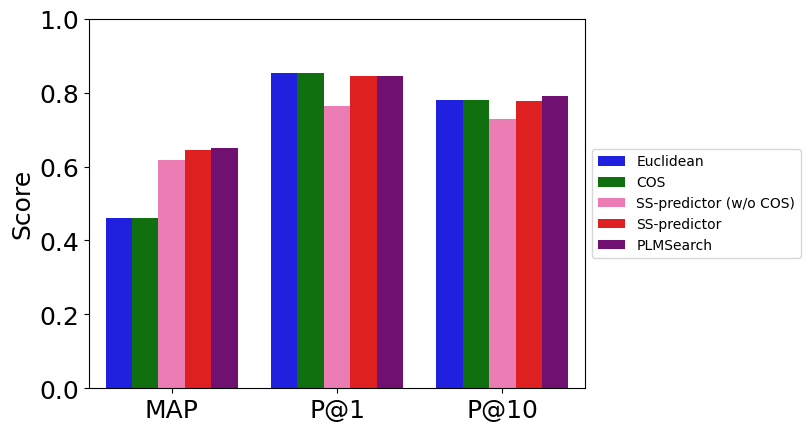

In [9]:
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import get_input_output, map_pk, map_pk_plot

todo_name_list = [
    "euclidean",
    "cos",
    "ss_predictor_without_cos",
    "ss_predictor",
    "plmsearch"
]
color_dict = {
    "Euclidean": "blue",
    "COS": "green",
    "SS-predictor (w/o COS)": "#FF69B4",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}
method_list = ["Euclidean", "COS", "SS-predictor (w/o COS)", "SS-predictor", "PLMSearch"]

# Evaluation based on TM-score benchmark(Metrics for evaluating different search methods) on Swiss-Prot to Swiss-Prot
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]
df_dict_1 = map_pk(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)

# Evaluation based on TM-score benchmark(Metrics for evaluating different search methods) on SCOPe40 to Swiss-Prot
todo_dir_list = ["./plmsearch_data/scope_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/scope_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]
df_dict_2 = map_pk(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)

# Summary: Swiss-Prot
print("\nSummary for Swiss-Prot search tests(100 queries)")
for i in range(len(df_dict_2['score'])):
    df_dict_2['score'][i] = (df_dict_1['score'][i] + df_dict_2['score'][i])/2
    print(f"{df_dict_2['metric'][i]} of {df_dict_2['method'][i]}:{df_dict_2['score'][i]}")
map_pk_plot(df_dict_2, color_dict, legend=True)

### Why SS-predictor performs better than Euclidean and COS?

**Notice: If `CPU ONLY`, change the settings as described below**

We have 4 GPUs in total!, we will use as you selected
Pearson correlation coefficient of euclidean = 0.450159671014716
Spearman correlation coefficient of euclidean = 0.4292373829885652


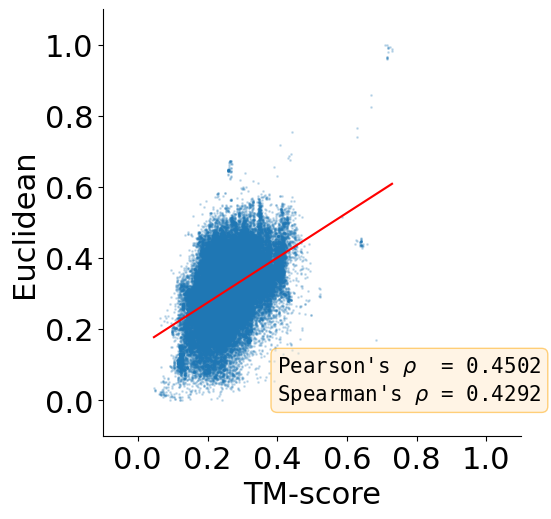

We have 4 GPUs in total!, we will use as you selected
Pearson correlation coefficient of cos = 0.4078440677169349
Spearman correlation coefficient of cos = 0.42986306433066546


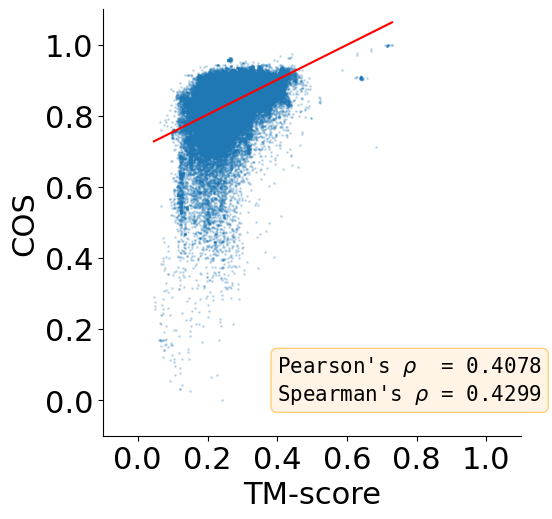

We have 4 GPUs in total!, we will use as you selected
Pearson correlation coefficient of SS-predictor (w/o COS) = 0.6877284102652473
Spearman correlation coefficient of SS-predictor (w/o COS) = 0.6860137487958302


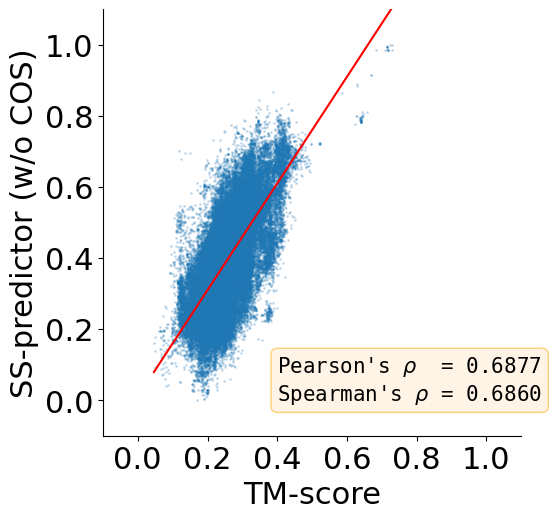

We have 4 GPUs in total!, we will use as you selected
Pearson correlation coefficient of SS-predictor = 0.6984992131369451
Spearman correlation coefficient of SS-predictor = 0.6954143896236131


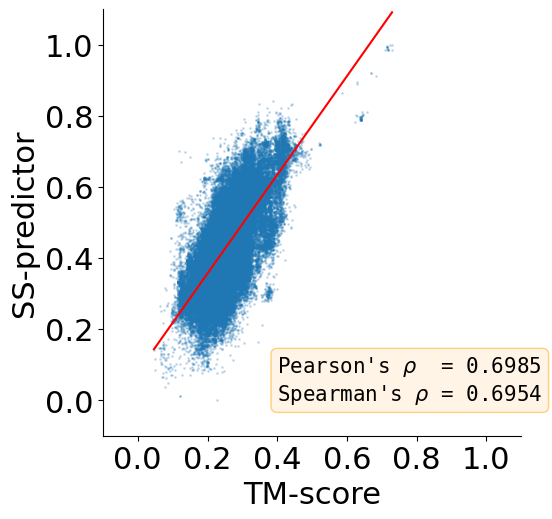

In [10]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import esm_similarity_correlation_statistics, plmsearch_correlation_statistics

# ss_esm_similarity statistics(swissprot_to_swissprot_5)
query_esm_filename = './plmsearch_data/swissprot_to_swissprot_5/embedding.pkl'
target_esm_filename = './plmsearch_data/swissprot/embedding.pkl'
device_id = [0]
# If cpu only
# device_id = [] 

query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot_5/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot_5/ss_mat.npy"

esm_similarity_correlation_statistics(query_esm_filename, target_esm_filename, query_protein_fasta_path, target_protein_fasta_path, ss_mat_path, device_id, mode='euclidean')

esm_similarity_correlation_statistics(query_esm_filename, target_esm_filename, query_protein_fasta_path, target_protein_fasta_path, ss_mat_path, device_id, mode='cos')

# ss_predictor_score statistics
save_model_path = './plmsearch_data/model/plmsearch.sav'
plmsearch_correlation_statistics(query_esm_filename, target_esm_filename, query_protein_fasta_path, target_protein_fasta_path, ss_mat_path, save_model_path, device_id, cos = False)

save_model_path = './plmsearch_data/model/plmsearch.sav'
plmsearch_correlation_statistics(query_esm_filename, target_esm_filename, query_protein_fasta_path, target_protein_fasta_path, ss_mat_path, save_model_path, device_id, cos = True)

### Which pair is recalled? Which pair is missed?


Get search list without self: 5681it [00:00, 105799.48it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2273828.47it/s]
Get search list without self: 837it [00:00, 18660.47it/s]
100%|██████████| 832/832 [00:00<00:00, 2045522.23it/s]
Get search list without self: 7488it [00:00, 131502.81it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2328875.07it/s]
Get search list without self: 7488it [00:00, 136113.43it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2204048.34it/s]
Get search list without self: 2150700it [00:16, 129878.18it/s]
100%|██████████| 5000/5000 [00:00<00:00, 1192173.27it/s]
Get search list without self: 17355it [00:00, 122185.11it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2404163.71it/s]


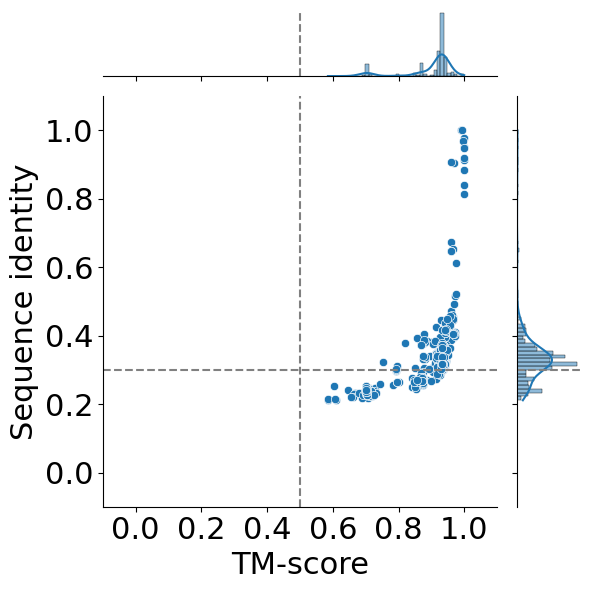

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=183/1105
st1_se0_rate=0.16561085972850678
st1_num=757/1679
st1_rate=0.4508636092912448
---------------------------------------------


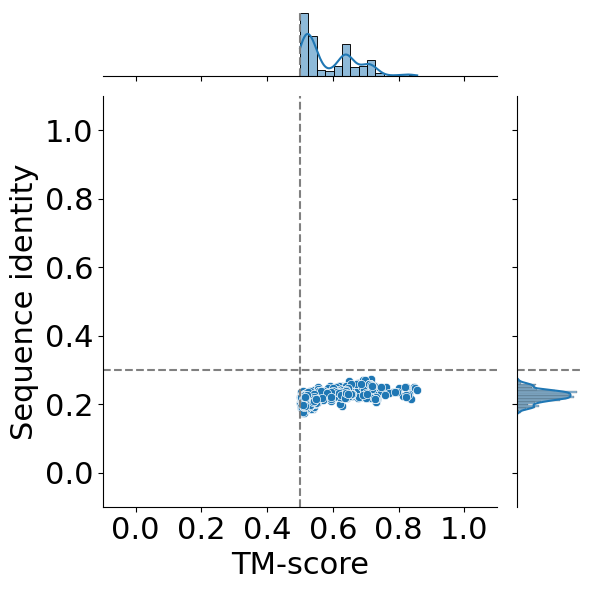

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=922/1105
st1_se0_rate=0.8343891402714932
st1_num=922/1679
st1_rate=0.5491363907087552
---------------------------------------------


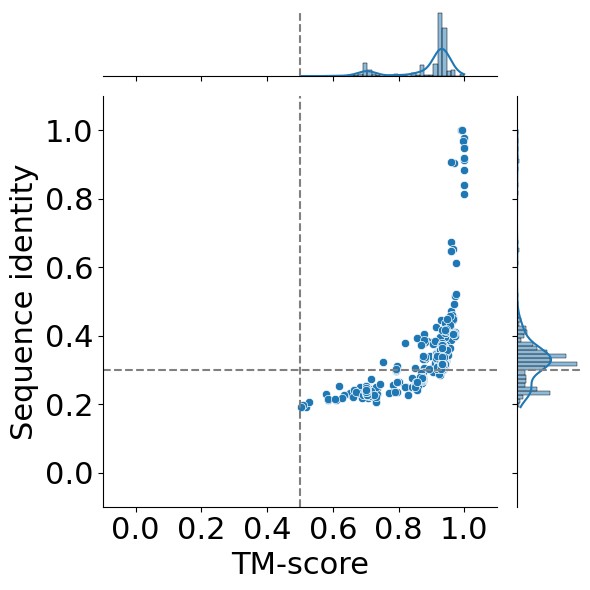

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=203/1105
st1_se0_rate=0.18371040723981902
st1_num=777/1679
st1_rate=0.46277546158427635
---------------------------------------------


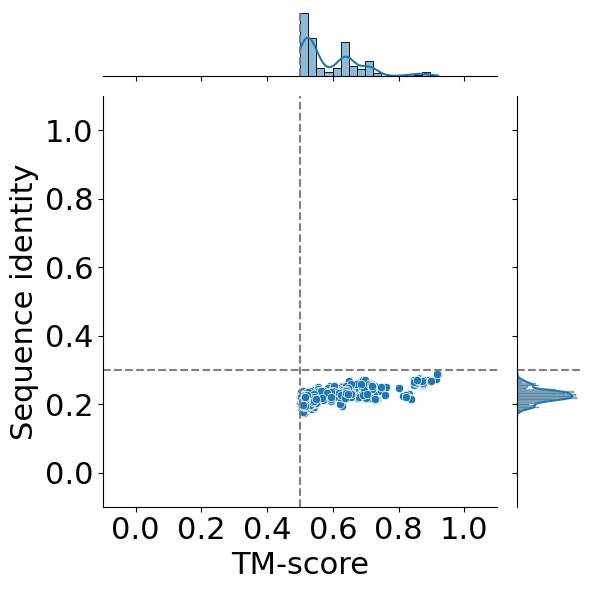

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=902/1105
st1_se0_rate=0.816289592760181
st1_num=902/1679
st1_rate=0.5372245384157236
---------------------------------------------


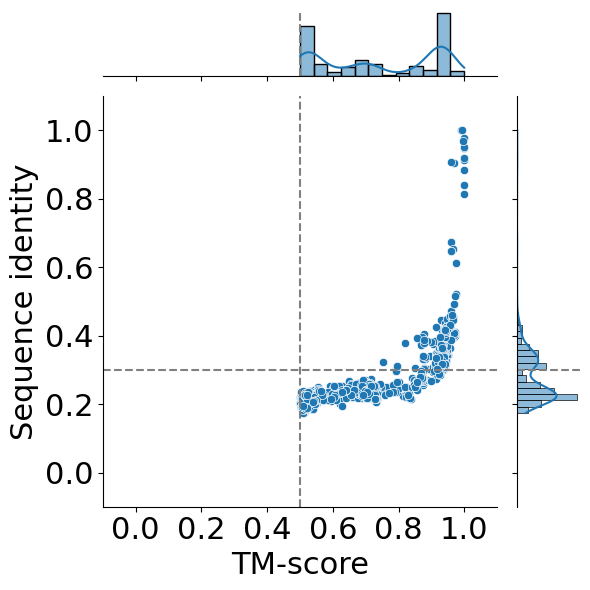

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=934/1105
st1_se0_rate=0.8452488687782805
st1_num=1508/1679
st1_rate=0.8981536628945801
---------------------------------------------


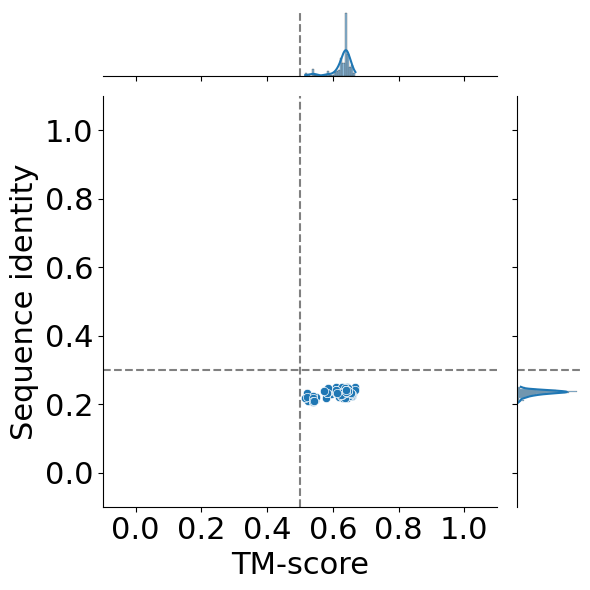

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=171/1105
st1_se0_rate=0.15475113122171946
st1_num=171/1679
st1_rate=0.10184633710541989
---------------------------------------------


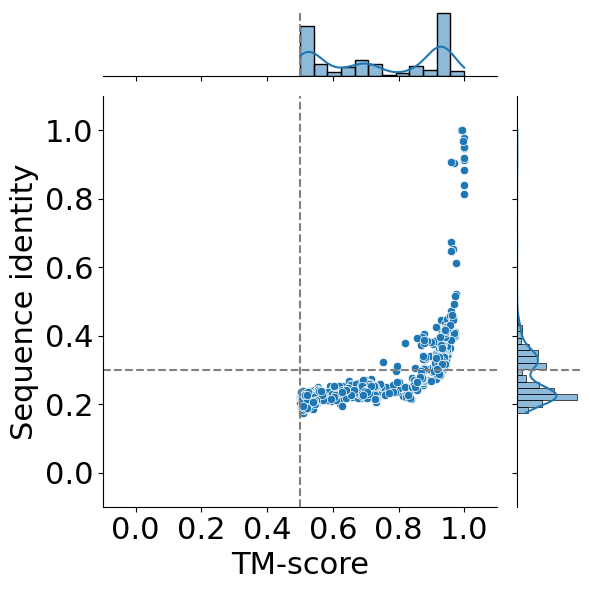

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=940/1105
st1_se0_rate=0.8506787330316742
st1_num=1514/1679
st1_rate=0.9017272185824896
---------------------------------------------


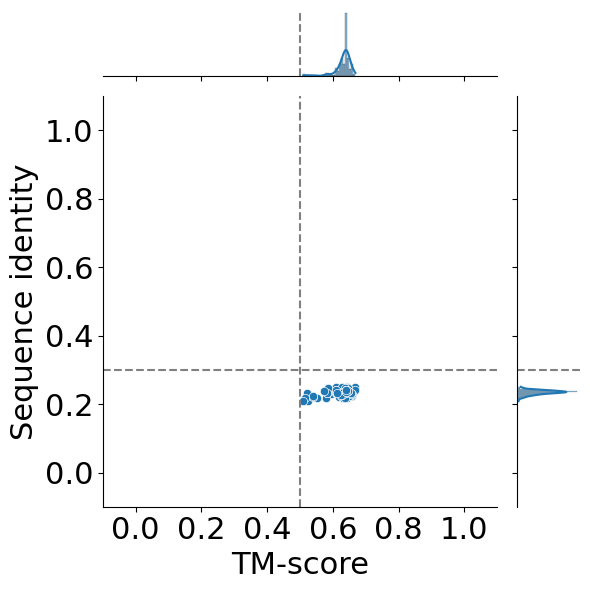

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=165/1105
st1_se0_rate=0.1493212669683258
st1_num=165/1679
st1_rate=0.09827278141751042
---------------------------------------------


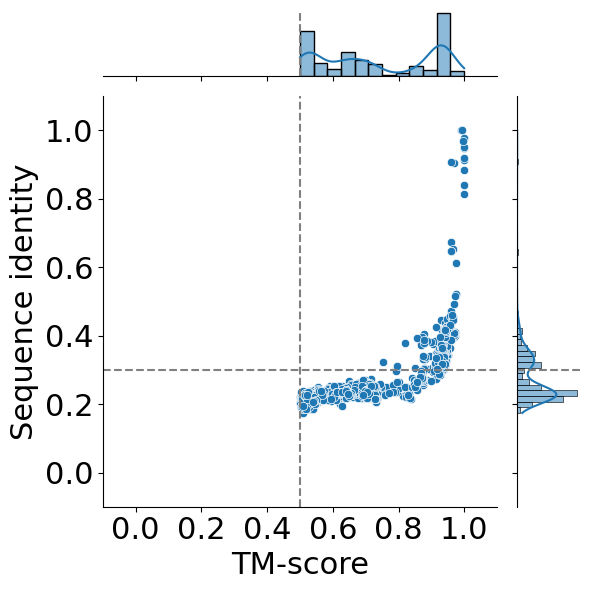

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=1051/1105
st1_se0_rate=0.951131221719457
st1_num=1625/1679
st1_rate=0.9678379988088148
---------------------------------------------


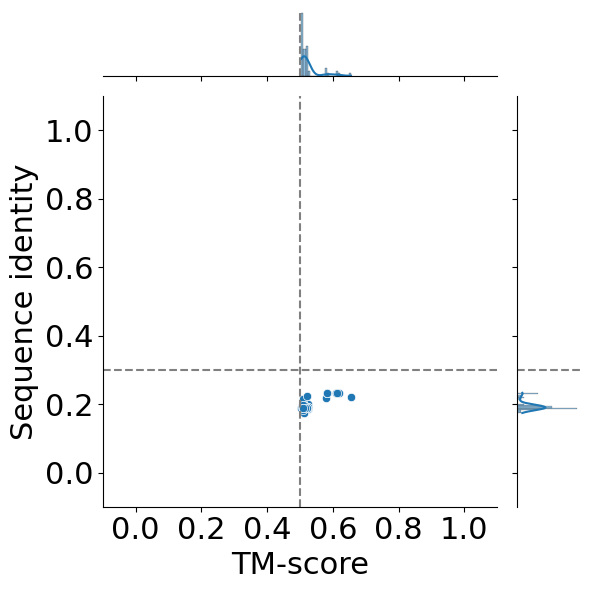

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=54/1105
st1_se0_rate=0.048868778280542986
st1_num=54/1679
st1_rate=0.03216200119118523
---------------------------------------------


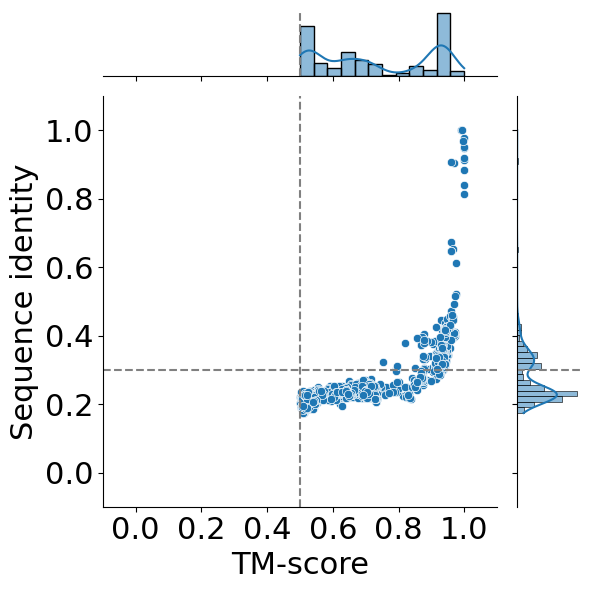

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=1098/1105
st1_se0_rate=0.9936651583710407
st1_num=1672/1679
st1_rate=0.9958308516974389
---------------------------------------------


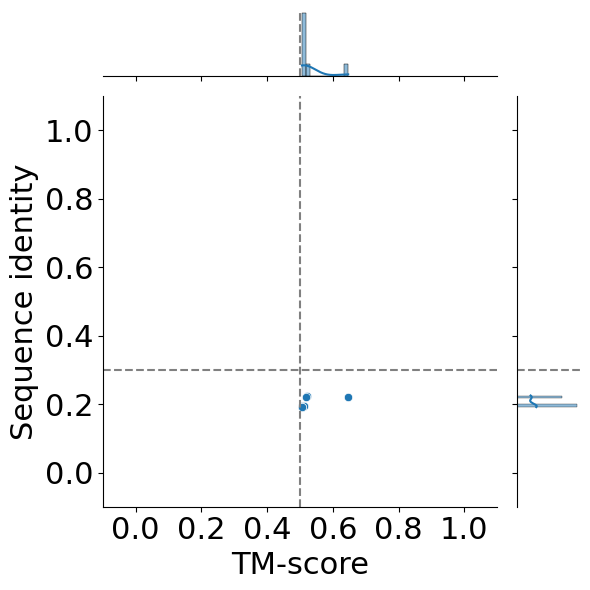

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=7/1105
st1_se0_rate=0.006334841628959276
st1_num=7/1679
st1_rate=0.004169148302561048
---------------------------------------------


In [11]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import get_input_output, get_miss_wrong_statistics, sequence_structure_statistics, pair_list_statistics

# Miss fault statistics(swissprot_to_swissprot, get & miss)
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot_5/search_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot_5/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot_5/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
result_path = './scientist_figures/swissprot_to_swissprot_5/get_miss/'
todo_name_list = [
    'mmseqs2',
    'blastp',
    'foldseek',
    'foldseek_tm',
    'ss_predictor',
    'plmsearch'
]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
top_list = [5000, 5000, 5000, 5000, 5000, 5000]
get_miss_wrong_statistics(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, top_list, result_path)

# Pair list statistics
pair_list_filename_list = []
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_mmseqs2.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_mmseqs2.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_blastp.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_blastp.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_foldseek.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_foldseek.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_foldseek_tm.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_foldseek_tm.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_ss_predictor.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_ss_predictor.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_plmsearch.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_plmsearch.txt")

query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot_5/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot_5/ss_mat.npy"
st1_se1_sum, st1_se0_sum, st1_sum = sequence_structure_statistics(query_protein_fasta_path, target_protein_fasta_path, ss_mat_path)

for pair_list_filename in pair_list_filename_list:
    pair_list_statistics(pair_list_filename, query_protein_fasta_path, target_protein_fasta_path, ss_mat_path, st1_se1_sum, st1_se0_sum, st1_sum)

### (Supplement) Pfam Comparison between PfamFamily & PfamClan

Get search list without self: 12902it [00:00, 169886.32it/s]


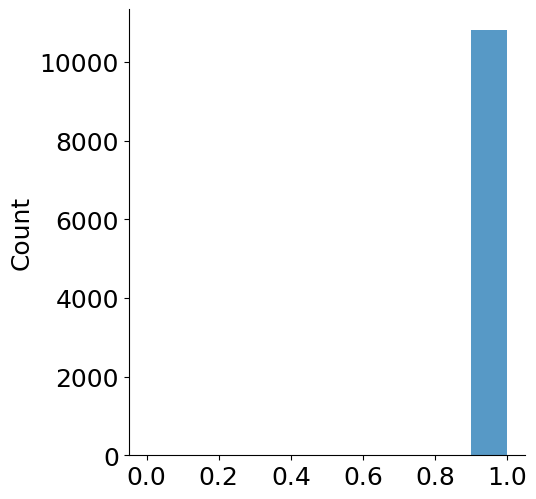

-------------- Output for ./scientist_figures/scope_test/pfamfamily.txt --------------

rec_rate:0.056679694672507414
rec:10804/190615

pre_rate:0.9987058606026992
pre:10804/10818



Get search list without self: 142756it [00:01, 132859.89it/s]


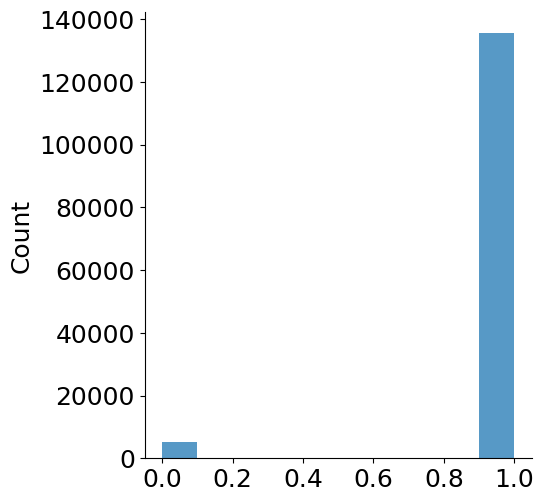

-------------- Output for ./scientist_figures/scope_test/pfamclan.txt --------------

rec_rate:0.7108359782808279
rec:135496/190615

pre_rate:0.963205186533212
pre:135496/140672



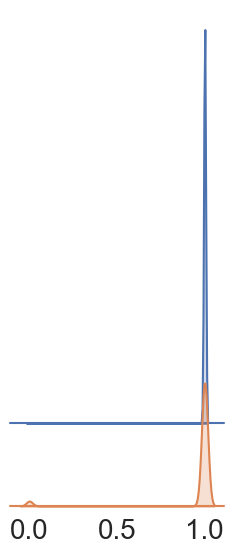

Get search list without self: 28648it [00:00, 149851.12it/s]


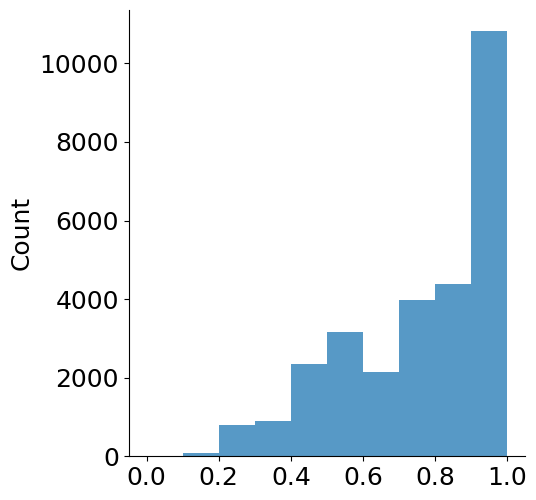

-------------- Output for ./scientist_figures/swissprot_to_swissprot/pfamfamily.txt --------------

rec_rate:0.3067207938655841
rec:24480/79812

pre_rate:0.8560039163577873
pre:24480/28598



Get search list without self: 439249it [00:03, 146260.17it/s]


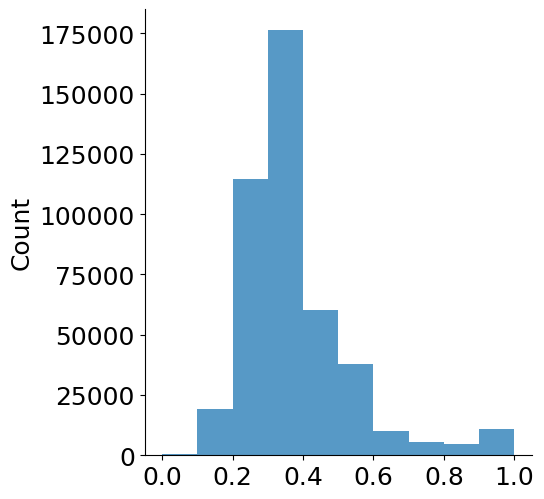

-------------- Output for ./scientist_figures/swissprot_to_swissprot/pfamclan.txt --------------

rec_rate:0.8577657495113516
rec:68460/79812

pre_rate:0.155874671845792
pre:68460/439199



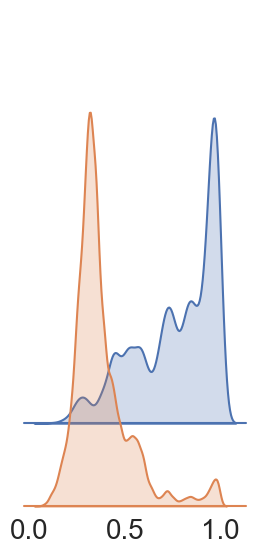

Get search list without self: 15714it [00:00, 66587.49it/s]


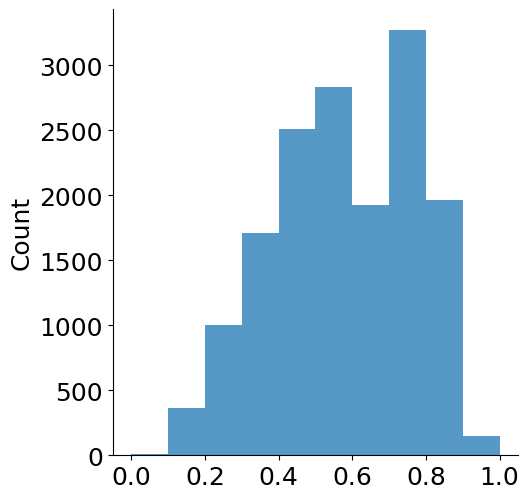

-------------- Output for ./scientist_figures/scope_to_swissprot/pfamfamily.txt --------------

rec_rate:0.34685285963651297
rec:10134/29217

pre_rate:0.6449026345933563
pre:10134/15714



Get search list without self: 203101it [00:01, 146927.26it/s]


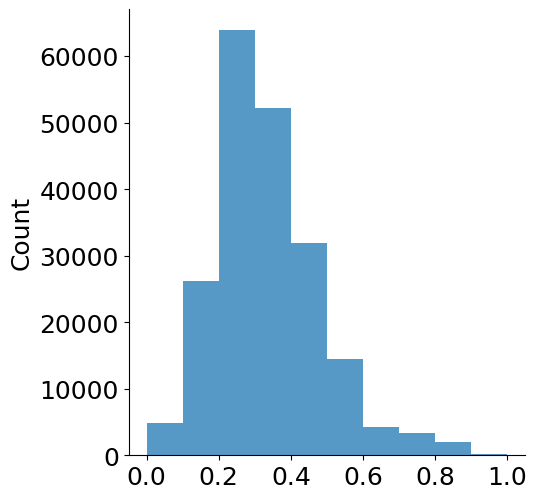

-------------- Output for ./scientist_figures/scope_to_swissprot/pfamclan.txt --------------

rec_rate:0.8257863572577608
rec:24127/29217

pre_rate:0.11879311278624921
pre:24127/203101



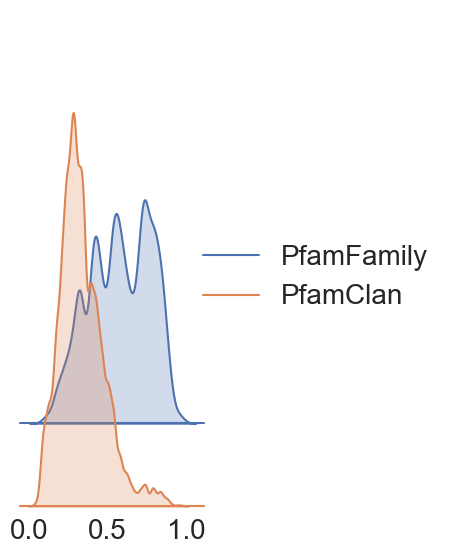

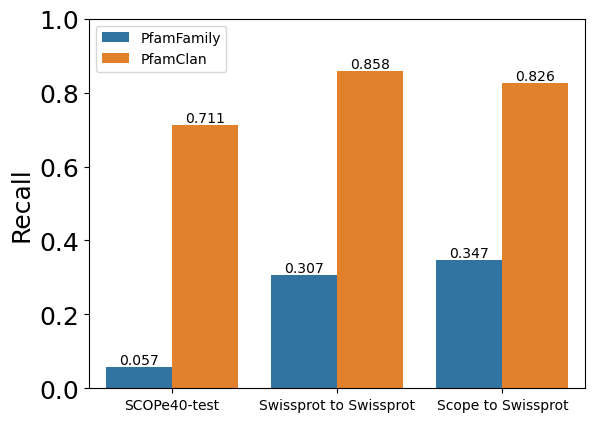

In [12]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import get_input_output, precision_recall_statistics, precision_recall_plot

df_dict = {}
df_dict['dataset'] = []
df_dict['recall'] = []
df_dict['method'] = []


# Pfam Compare(scope)
todo_dir_list = ["./plmsearch_data/scope_test/search_result/"]
ss_mat_path = "./plmsearch_data/scope_test/same_fold_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
todo_name_list = [
    'pfamfamily',
    'pfamclan'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamFamily', 'PfamClan']
top_list = ['all', 'all']
recall_dict = precision_recall_statistics(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, todo_fig_list, method_list, top_list, legend=False)
for method in method_list:
    df_dict['dataset'].append('SCOPe40-test')
    df_dict['recall'].append(eval(f"{recall_dict[method]:.3f}"))
    df_dict['method'].append(method)

# Pfam Compare(swissprot_to_swissprot)
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_name_list = [
    'pfamfamily',
    'pfamclan'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamFamily', 'PfamClan']
top_list = ['all', 'all']
recall_dict = precision_recall_statistics(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, todo_fig_list, method_list, top_list, legend=False)
for method in method_list:
    df_dict['dataset'].append('Swissprot to Swissprot')
    df_dict['recall'].append(eval(f"{recall_dict[method]:.3f}"))
    df_dict['method'].append(method)

# Pfam Compare(scope_to_swissprot)
todo_dir_list = ["./plmsearch_data/scope_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/scope_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_name_list = [
    'pfamfamily',
    'pfamclan'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamFamily', 'PfamClan']
top_list = ['all', 'all']
recall_dict = precision_recall_statistics(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, todo_fig_list, method_list, top_list, legend=True)
for method in method_list:
    df_dict['dataset'].append('Scope to Swissprot')
    df_dict['recall'].append(eval(f"{recall_dict[method]:.3f}"))
    df_dict['method'].append(method)

precision_recall_plot(df_dict)


### Statistics of the number of proteins in protein families on SCOPe40-test, Swiss-Prot

/home/lw/anaconda3/envs/plmsearch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2207it [00:00, 190000.59it/s]
430140it [00:02, 201938.93it/s]


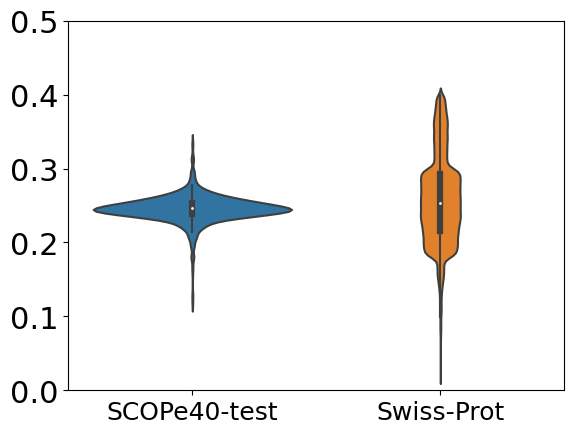

/home/lw/plmsearch/plmsearch/plmsearch_util/statistics_util.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(label)) for label in ax.get_xticks()])


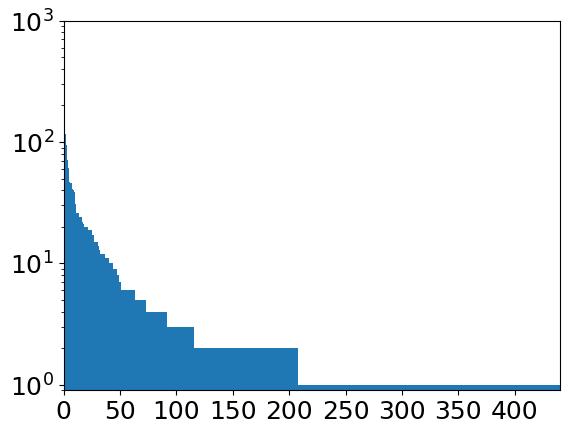

/home/lw/plmsearch/plmsearch/plmsearch_util/statistics_util.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(label)) for label in ax.get_xticks()])


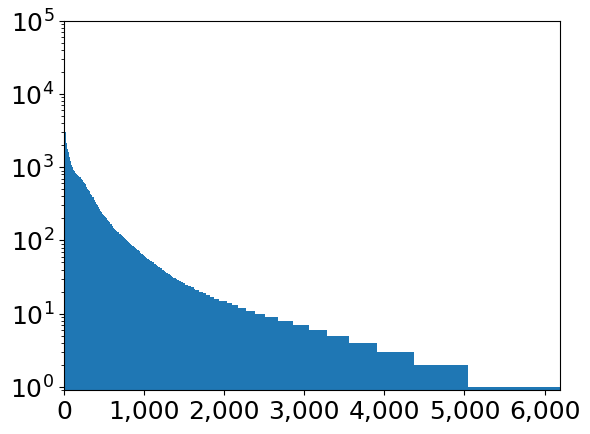

In [1]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import cluster_statistics, max_sequence_identity_statistics

max_sequence_identity_list = ["./plmsearch_data/scope_test/max_sequence_identity", "./plmsearch_data/swissprot/max_sequence_identity"]
dataset_list = ["SCOPe40-test", "Swiss-Prot"]
max_sequence_identity_statistics(max_sequence_identity_list, dataset_list)

# Cluster statistics(scope test)
pfam_result = "./plmsearch_data/scope_test/pfam_result.json"
clan_file = './plmsearch_data/Pfam_db/Pfam-A.clans.tsv'
result_path = './scientist_figures/scope_test/'
cluster_statistics(pfam_result, clan_file, result_path)

# Cluster statistics(swissprot)
pfam_result = "./plmsearch_data/swissprot/pfam_result.json"
clan_file = './plmsearch_data/Pfam_db/Pfam-A.clans.tsv'
result_path = './scientist_figures/swissprot/'
cluster_statistics(pfam_result, clan_file, result_path)


### Reference similarity statistics

4870849it [00:41, 116344.05it/s]


Same fold pairs = 190615
Different fold pairs = 4680234
P(Same fold) = 0.03913383477911141
P(Different fold) = 0.9608661652208886
Similarity = 0.2, Same Fold Posterior Probability = 0
Similarity = 0.2, Different Fold Posterior Probability = 1
Similarity = 0.3, Same Fold Posterior Probability = 0.0
Similarity = 0.3, Different Fold Posterior Probability = 1.0
Similarity = 0.4, Same Fold Posterior Probability = 0.0
Similarity = 0.4, Different Fold Posterior Probability = 1.0
Similarity = 0.5, Same Fold Posterior Probability = 0.005933650993437023
Similarity = 0.5, Different Fold Posterior Probability = 0.994066349006563
Similarity = 0.6, Same Fold Posterior Probability = 0.032145433559370946
Similarity = 0.6, Different Fold Posterior Probability = 0.967854566440629
Similarity = 0.7, Same Fold Posterior Probability = 0.5158582089552239
Similarity = 0.7, Different Fold Posterior Probability = 0.4841417910447761
Similarity = 0.8, Same Fold Posterior Probability = 0.9943502824858758
Similarit

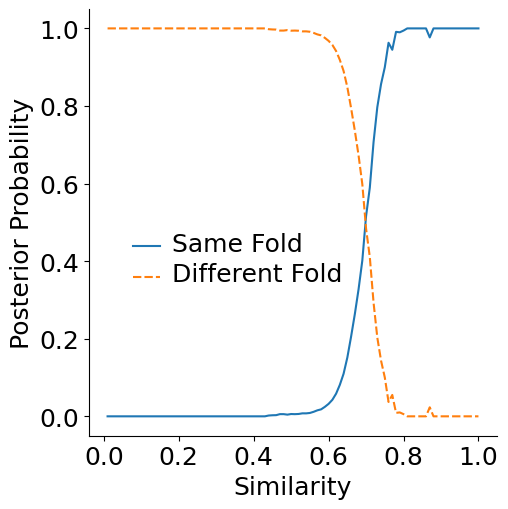

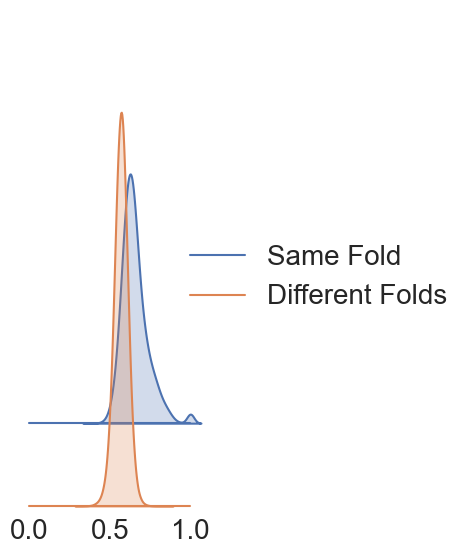

4870849it [00:43, 111324.27it/s]


Same fold pairs = 190615
Different fold pairs = 4680234
P(Same fold) = 0.03913383477911141
P(Different fold) = 0.9608661652208886
Similarity = 0.991, Same Fold Posterior Probability = 0.4173027989821883
Similarity = 0.991, Different Fold Posterior Probability = 0.5826972010178116
Similarity = 0.992, Same Fold Posterior Probability = 0.5347985347985348
Similarity = 0.992, Different Fold Posterior Probability = 0.4652014652014652
Similarity = 0.993, Same Fold Posterior Probability = 0.6303901437371664
Similarity = 0.993, Different Fold Posterior Probability = 0.36960985626283366
Similarity = 0.994, Same Fold Posterior Probability = 0.7866666666666667
Similarity = 0.994, Different Fold Posterior Probability = 0.21333333333333332
Similarity = 0.995, Same Fold Posterior Probability = 0.8905109489051095
Similarity = 0.995, Different Fold Posterior Probability = 0.1094890510948905
Similarity = 0.996, Same Fold Posterior Probability = 0.9603174603174603
Similarity = 0.996, Different Fold Poste

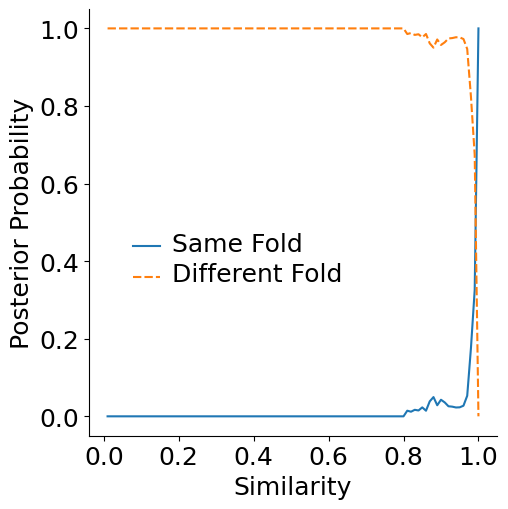

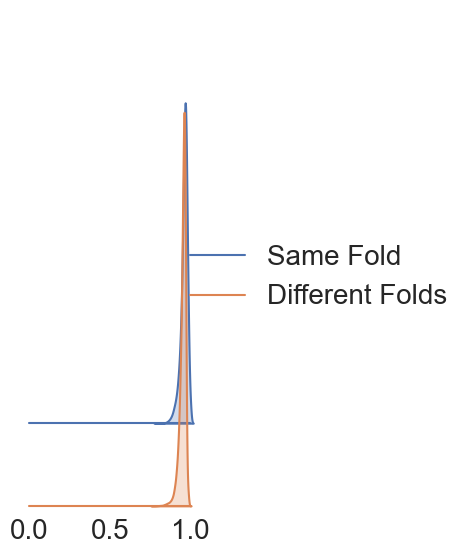

In [14]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import scope_similarity_statistics

# Scope_similarity_statistics
similarity_file = "./plmsearch_data/scope_test/search_result/ss_predictor"
fold_file = "./plmsearch_data/scope_test/scop_lookup.tsv"
check_set = set((0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9))
scope_similarity_statistics(similarity_file, fold_file, check_set)

# Scope_similarity_statistics
similarity_file = "./plmsearch_data/scope_test/search_result/cos"
fold_file = "./plmsearch_data/scope_test/scop_lookup.tsv"
check_set = set((0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999))
scope_similarity_statistics(similarity_file, fold_file, check_set)

## Other baselines

In [15]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("3dblastsw" "clesw" "cealn" "dalialn" "ss_predictor" "plmsearch")

for method in "${methods[@]}"; do
    echo "Processing method: $method"
    ### The area under the curve (AUC) of the cumulative ROC curve up to the first FP
    awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/${method}.rocx
    ### The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP
    awk '{ FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/${method}.rocx
done
cd ../..

Processing method: 3dblastsw
0.653066 0.255024 0.0453962
6.95567 8.92568 1.44459 17.3259
Processing method: clesw
0.672991 0.265721 0.033716
6.97784 9.65971 1.10691 17.7445
Processing method: cealn
0.847345 0.527171 0.148135
8.70274 23.8292 8.7249 41.2568
Processing method: dalialn
0.923185 0.702481 0.28161
9.23338 33.6232 16.7445 59.601
Processing method: ss_predictor
0.889835 0.542428 0.113374
8.9296 21.8136 6.01956 36.7627
Processing method: plmsearch
0.917426 0.733827 0.298465
9.24641 34.3129 22.5189 66.0782


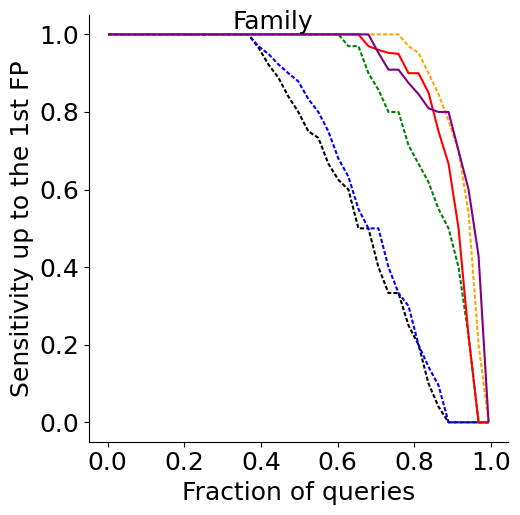

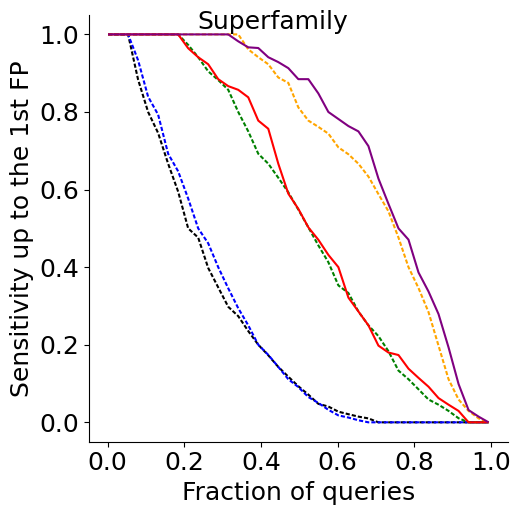

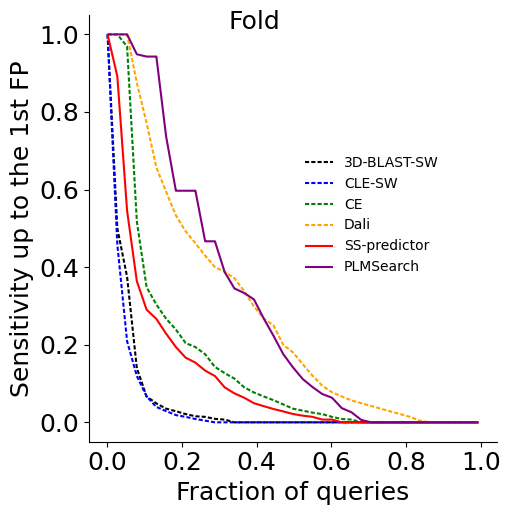

AUPR for 3D-BLAST-SW (Family): 0.62128353284495
AUPR for CLE-SW (Family): 0.43268550590105
AUPR for CE (Family): 0.8820657008359999
AUPR for Dali (Family): 0.9485319491895
AUPR for SS-predictor (Family): 0.9135331779002499
AUPR for PLMSearch (Family): 0.9255337197110501


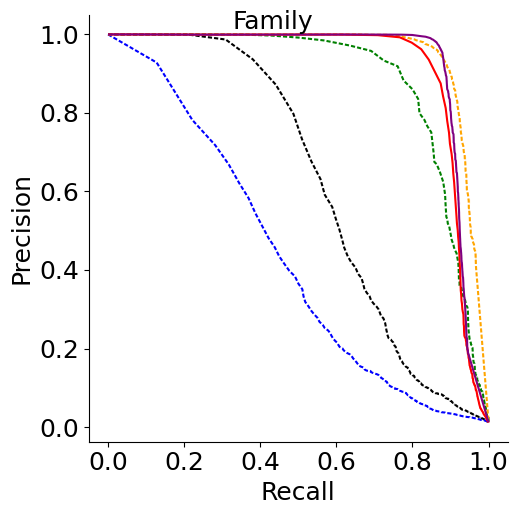

AUPR for 3D-BLAST-SW (Superfamily): 0.26488004733065
AUPR for CLE-SW (Superfamily): 0.17163849933534994
AUPR for CE (Superfamily): 0.6276118624165999
AUPR for Dali (Superfamily): 0.8149325952725001
AUPR for SS-predictor (Superfamily): 0.61309026419332
AUPR for PLMSearch (Superfamily): 0.7689498754398251


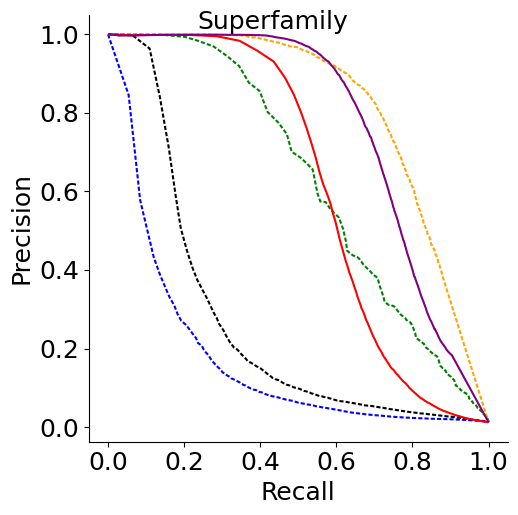

AUPR for 3D-BLAST-SW (Fold): 0.047029300495728
AUPR for CLE-SW (Fold): 0.035361556232895
AUPR for CE (Fold): 0.24513631142033
AUPR for Dali (Fold): 0.4545783160487
AUPR for SS-predictor (Fold): 0.18324057715983696
AUPR for PLMSearch (Fold): 0.3120473874680405


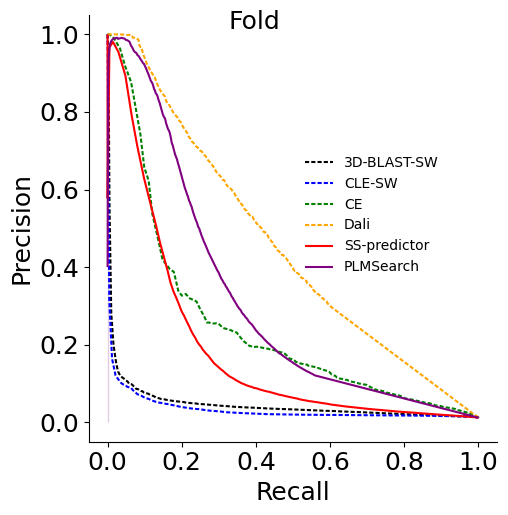

In [16]:
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import scop_roc, scop_pr

methods_name_list = ["3D-BLAST-SW", "CLE-SW", "CE", "Dali", "SS-predictor", "PLMSearch"]
line_style = [(2,1), (2,1), (2,1), (2,1), (1,0), (1,0)]
color_dict = {
    "3D-BLAST-SW": "black",
    "CLE-SW": "blue",
    "CE": "green",
    "Dali": "orange",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}

alnresult_dir = "./plmsearch_data/scope_test/rocx/"
methods_filename_list = ["3dblastsw.rocx", "clesw.rocx", "cealn.rocx", "dalialn.rocx", "ss_predictor.rocx", "plmsearch.rocx"]
scop_roc(alnresult_dir, methods_filename_list, methods_name_list, line_style, color_dict, legend_pos=0.7)

alnresult_dir = "./plmsearch_data/scope_test/prx/"
methods_filename_list = ["3dblastsw.prx", "clesw.prx", "cealn.prx", "dalialn.prx", "ss_predictor.prx", "plmsearch.prx"]
scop_pr(alnresult_dir, methods_filename_list, methods_name_list, line_style, color_dict, legend_pos=0.7)

Get search list without self: 4859508it [00:32, 147289.83it/s]
100%|██████████| 4857305/4857305 [00:03<00:00, 1512020.92it/s]


MAP of 3D-BLAST-SW:0.4464819354162413
P@1 of 3D-BLAST-SW:0.8251019483461712
P@10 of 3D-BLAST-SW:0.6049841413683733


Get search list without self: 4870413it [00:35, 137757.47it/s]
100%|██████████| 4868206/4868206 [00:03<00:00, 1458965.93it/s]


MAP of CLE-SW:0.44042703425762253
P@1 of CLE-SW:0.8142274580879021
P@10 of CLE-SW:0.5924784775713635


Get search list without self: 4870849it [00:36, 133137.40it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1452272.90it/s]


MAP of CE:0.618318981310886
P@1 of CE:0.8975985500679655
P@10 of CE:0.7344811961939283


Get search list without self: 236029it [00:01, 142978.52it/s]
100%|██████████| 233827/233827 [00:00<00:00, 1350388.87it/s]


MAP of Dali:0.7024833943410841
P@1 of Dali:0.927956502038967
P@10 of Dali:0.7903488898957866


Get search list without self: 4870849it [00:37, 129970.68it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1439105.91it/s]


MAP of SS-predictor:0.56963262263967
P@1 of SS-predictor:0.8500226551880381
P@10 of SS-predictor:0.7233801540552787


Get search list without self: 837769it [00:06, 120104.46it/s]
100%|██████████| 835562/835562 [00:00<00:00, 1413837.68it/s]


MAP of PLMSearch:0.6830676794934877
P@1 of PLMSearch:0.9265971907566832
P@10 of PLMSearch:0.7702763932940632


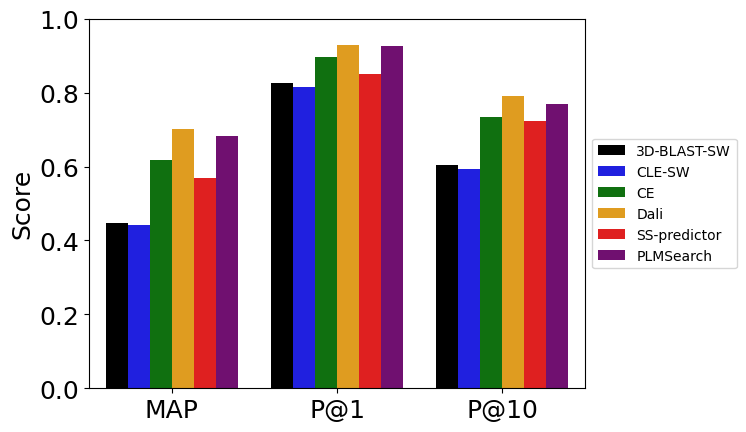

############# Experiment on new proteins #############
Total count of new proteins: 123


Get search list without self: 4859508it [00:34, 141304.40it/s]
100%|██████████| 4857305/4857305 [00:03<00:00, 1474569.84it/s]


MAP of 3D-BLAST-SW:0.3794379230398085
P@1 of 3D-BLAST-SW:0.7642276422764228
P@10 of 3D-BLAST-SW:0.5601626016260164


Get search list without self: 4870413it [00:35, 138657.44it/s]
100%|██████████| 4868206/4868206 [00:03<00:00, 1428599.83it/s]


MAP of CLE-SW:0.3924383113293678
P@1 of CLE-SW:0.7886178861788617
P@10 of CLE-SW:0.5577235772357723


Get search list without self: 4870849it [00:37, 130340.51it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1470596.49it/s]


MAP of CE:0.5765951281406179
P@1 of CE:0.8699186991869918
P@10 of CE:0.6991869918699187


Get search list without self: 236029it [00:01, 119136.73it/s]
100%|██████████| 233827/233827 [00:00<00:00, 1323132.48it/s]


MAP of Dali:0.6364659720787397
P@1 of Dali:0.9105691056910569
P@10 of Dali:0.7723577235772356


Get search list without self: 4870849it [00:38, 125081.82it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1427010.61it/s]


MAP of SS-predictor:0.5770145894796361
P@1 of SS-predictor:0.8130081300813008
P@10 of SS-predictor:0.7260162601626016


Get search list without self: 837769it [00:06, 122966.95it/s]
100%|██████████| 835562/835562 [00:00<00:00, 1447635.50it/s]


MAP of PLMSearch:0.5770145894796361
P@1 of PLMSearch:0.8130081300813008
P@10 of PLMSearch:0.7260162601626016


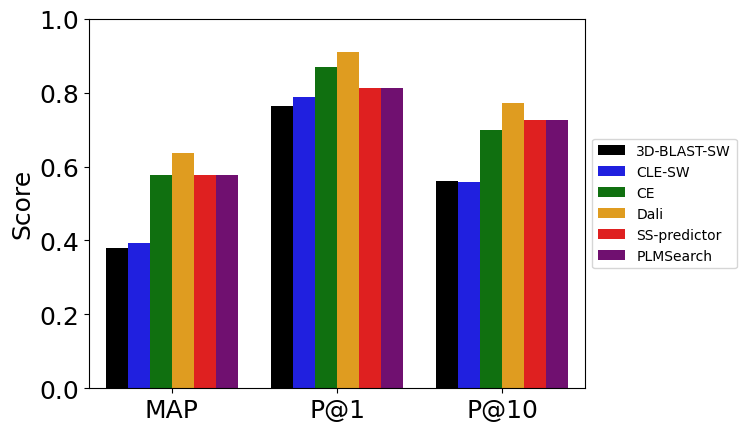

In [17]:
import sys
sys.path.append("./plmsearch/")
import json
from plmsearch.plmsearch_util.statistics_util import get_input_output, map_pk, map_pk_plot

todo_name_list = [
    "3dblastsw",
    "clesw",
    "cealn",
    "dalialn",
    "ss_predictor",
    "plmsearch"
]
color_dict = {
    "3D-BLAST-SW": "black",
    "CLE-SW": "blue",
    "CE": "green",
    "Dali": "orange",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}
method_list = ["3D-BLAST-SW", "CLE-SW", "CE", "Dali", "SS-predictor", "PLMSearch"]

todo_dir_list = ["./plmsearch_data/scope_test/search_result/"]
same_fold_mat = "./plmsearch_data/scope_test/same_fold_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]

# All query protein
df_dict_1 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)
map_pk_plot(df_dict_1, color_dict, legend=True)

# New query protein (without pfam result)
special_protein_list = []
with open("./plmsearch_data/scope_test/pfam_result.json", 'r') as pfam_json_f:
    pfam_result = json.load(pfam_json_f)

for protein_id, pfam_data in pfam_result.items():
    if not pfam_data:
        special_protein_list.append(protein_id)
print(f"############# Experiment on new proteins #############")
print(f"Total count of new proteins: {len(special_protein_list)}")
df_dict_2 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list, special_protein_list=special_protein_list)
map_pk_plot(df_dict_2, color_dict, legend=True)

## Different settings of methods (Foldseek, MMseqs2, TM-align)

In [18]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("mmseqs2_default" "mmseqs2" "foldseek_default" "foldseek" "foldseek_tm" "tmaln_default" "tmaln_avg_score" "tmaln")

for method in "${methods[@]}"; do
    echo "Processing method: $method"
    ### The area under the curve (AUC) of the cumulative ROC curve up to the first FP
    awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/${method}.rocx
    ### The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP
    awk '{ FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/${method}.rocx
done
cd ../..

Processing method: mmseqs2_default
0.157413 0.0216475 1.08648e-05
0.861799 0.135593 0 0.997392
Processing method: mmseqs2
0.318421 0.0507028 0.00292006
2.206 0.516297 0.0247718 2.74707
Processing method: foldseek_default
0.883598 0.584277 0.213936
8.57366 28.3299 14.1851 51.0887
Processing method: foldseek
0.883598 0.584344 0.214083
8.57366 28.3364 14.1917 51.1017
Processing method: foldseek_tm
0.898516 0.66496 0.296947
8.68709 34.6258 20.7979 64.1108
Processing method: tmaln_default
0.859197 0.529836 0.158013
8.40156 22.4889 8.27119 39.1617
Processing method: tmaln_avg_score
0.933349 0.711424 0.326272
9.26336 37.5293 23.292 70.0847
Processing method: tmaln
0.9355 0.721375 0.346205
9.29726 38.5776 24.8318 72.7066


## Server time

/home/lw/anaconda3/envs/plmsearch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


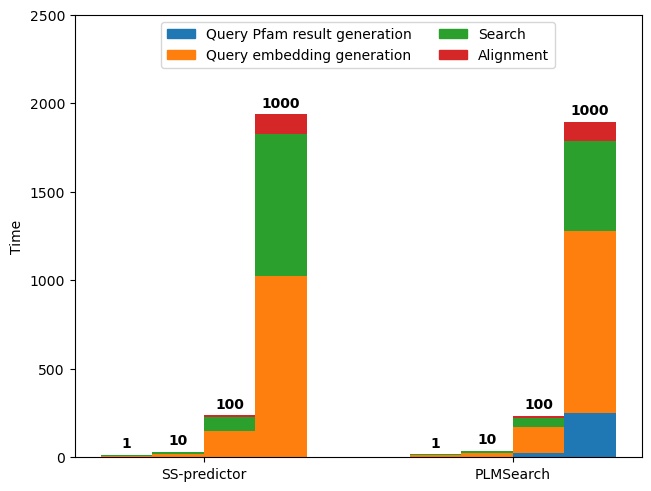

In [1]:
import sys
sys.path.append("./plmsearch/")
import json
from plmsearch.plmsearch_util.statistics_util import server_time
methods = ['SS-predictor', 'PLMSearch']
time_counts = {
    'Query Pfam result generation': {'SS-predictor':[0,0,0,0], 'PLMSearch':[1,4,26,253]},
    'Query embedding generation': {'SS-predictor':[10,20,146,1025], 'PLMSearch':[10,20,146,1025]},
    'Search': {'SS-predictor':[4,11,80,804], 'PLMSearch':[6,11,52,507]},
    'Alignment': {'SS-predictor':[0,1,12,110], 'PLMSearch':[0,1,12,110]}
}
server_time(methods, time_counts)